**MID SEMESTER EXAMINATION**

Name: Rohan Shirodkar

Roll no: 18110142

Credits: All codes are created by me or taken from the repository

1(a): Stanford Manipulator

In [78]:
# STANFORD TYPE (RRP)

# Importing Libraries
import numpy as np

# Creating Class Robot and defining functions
class Robot():
  def __init__(self, endeffector_position, lengthsoflinks):
    self.endeffector_position = endeffector_position
    self.lengthsoflinks = lengthsoflinks
  
  def inverse_kinematics(self):
    theta1 = np.arctan2(self.endeffector_position[1],self.endeffector_position[0])
    r = np.sqrt(self.endeffector_position[0]**2 + self.endeffector_position[1]**2)
    s = self.endeffector_position[2] - self.lengthsoflinks[0]
    theta2 = np.arctan2(s,r)
    d3 = np.sqrt(r**2 + s**2) - self.lengthsoflinks[1]
    return theta1, theta2, d3

  def forward_kinematics(self, theta1, theta2, d3):
    H01 = np.array([[np.cos(theta1), -np.sin(theta1), 0, 0], [np.sin(theta1), np.cos(theta1), 0, 0], [0, 0, 1, 0],[0, 0, 0, 1]])
    H12 = np.array([[np.cos(theta2), -np.sin(theta2), 0, 0], [0, 0, -1, 0], [np.sin(theta2), np.cos(theta2), 0, 0.25],[0, 0, 0, 1]])
    H23 = np.array([[1, 0, 0, 0.25], [0, 1, 0, 0], [0, 0, 1, 0],[0, 0, 0, 1]])
    T = H01 @ H12 @ H23
    X = T @ [[d3],[0],[0],[1]]
    print(X[:3])

# Enter the coordinates of the end effector in the first input array. (x & y coordinates should be non zero to avoid singular configuration)
# Enter the values of d1 and a2 in the second input array.

# Point A: (0.45,0.075,0.1)
StanfordA = Robot([0.45,0.075,0.1],[0.25,0.25])
theta1_A, theta2_A, d3_A = StanfordA.inverse_kinematics()
print("Verification for point A: \n")
StanfordA.forward_kinematics(theta1_A, theta2_A, d3_A)

# Point B: (0.45,-0.075,0.1)
StanfordB = Robot([0.45,-0.075,0.1],[0.25,0.25])
theta1_B, theta2_B, d3_B = StanfordB.inverse_kinematics()
print("Verification for point B: \n")
StanfordB.forward_kinematics(theta1_B, theta2_B, d3_B)

# Point C: (0.25,-0.075,0.1)
StanfordC = Robot([0.25,-0.075,0.1],[0.25,0.25])
theta1_C, theta2_C, d3_C = StanfordC.inverse_kinematics()
print("Verification for point C: \n")
StanfordC.forward_kinematics(theta1_C, theta2_C, d3_C)

# Point D: (0.25,0.075,0.1)
StanfordD = Robot([0.25,0.075,0.1],[0.25,0.25])
theta1_D, theta2_D, d3_D = StanfordD.inverse_kinematics()
print("Verification for point D: \n")
StanfordD.forward_kinematics(theta1_D, theta2_D, d3_D)

Verification for point A: 

[[0.45 ]
 [0.075]
 [0.1  ]]
Verification for point B: 

[[ 0.45 ]
 [-0.075]
 [ 0.1  ]]
Verification for point C: 

[[ 0.25 ]
 [-0.075]
 [ 0.1  ]]
Verification for point D: 

[[0.25 ]
 [0.075]
 [0.1  ]]


1(a): Puma Manipulator

In [61]:
# PUMA TYPE (RRR)
import numpy as np
import math

# Creating Class Robot and defining functions
class Robot():
  def __init__(self, endeffector_position, lengthsoflinks):
    self.endeffector_position = endeffector_position
    self.lengthsoflinks = lengthsoflinks

  def inverse_kinematics(self):
    l1 = self.lengthsoflinks[0]
    l2 = self.lengthsoflinks[1]
    l3 = self.lengthsoflinks[2]
    xc = self.endeffector_position[0]
    yc = self.endeffector_position[1]
    zc = self.endeffector_position[2]
    theta1 = np.rad2deg(math.atan2(yc,xc))
    D = (xc*xc+yc*yc+(zc-l1)*(zc-l1)-l2*l2-l3*l3)/(2*l2*l3)
    if D>=1 or D<=-1:
        print("singular configuration")
    if D>1 or D<-1:
        print("outside workspace")
    theta3 = (math.atan2((-math.sqrt(1-D*D)),D))
    theta2 = np.rad2deg(math.atan2(l1-zc,(math.sqrt(xc*xc+yc*yc)))-math.atan2((l3*math.sin(theta3)),(l2+l3*math.cos(theta3))))
    theta3 = np.rad2deg(theta3)
    return np.deg2rad(theta1), np.deg2rad(theta2), np.deg2rad(theta3)

  def forward_kinematics(self, theta1, theta2, theta3):
    # Initializing object "robot" and calculating result
    # Mention the number of links in the first input
    # Enter the DH table row wise in the order: [THETA, D, A, ALPHA]
    # Enter Rho values for each link: 1 for Revolute and 0 for Prismatic
    self.numberoflinks = 3
    self.DH_matrix = [[theta1, 0.25, 0, -np.pi/2],[theta2, 0, 0.25, 0],[theta3, 0, 0.25, 0]]
    self.joint_types = [1,1,1]
    self.A = []
    self.R = []
    for i in range(self.numberoflinks):
      self.A.append(np.array([[np.cos(self.DH_matrix[i][0]), -np.sin(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), np.sin(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3]), self.DH_matrix[i][2] * np.cos(self.DH_matrix[i][0])],[np.sin(self.DH_matrix[i][0]), np.cos(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), -np.cos(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3]), self.DH_matrix[i][2] * np.sin(self.DH_matrix[i][0])],[0, np.sin(self.DH_matrix[i][3]), np.cos(self.DH_matrix[i][3]), self.DH_matrix[i][1]],[0, 0, 0, 1]])) 
      self.R.append(np.array([[np.cos(self.DH_matrix[i][0]), -np.sin(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), np.sin(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3])],[np.sin(self.DH_matrix[i][0]), np.cos(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), -np.cos(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3])],[0, np.sin(self.DH_matrix[i][3]), np.cos(self.DH_matrix[i][3])]]))
    self.A = np.array(self.A) # Array of Homogenous Transformation Matrices
    self.R = np.array(self.R) # Array of Rotation matrices
    
    # Creating array of R_0_n matrices (R01, R02, R03, R04 ...)
    self.R_0_n = []
    A = np.identity(3)
    for i in range(self.numberoflinks):
      self.R_0_n.append(A)
      A = np.matmul(A, self.R[i])
    self.R_0_n.append(A)
    self.R_0_n = np.array(self.R_0_n)

    # Creating array of H_0_n matrices (H01, H02, H03, H04 ...)
    self.H_0_n = []
    B = np.identity(4)
    for i in range(self.numberoflinks):
      self.H_0_n.append(B)
      B = np.matmul(B, self.A[i])
    self.H_0_n.append(B)
    self.H_0_n = np.array(self.H_0_n)
    
    # Calculating Final Transfornation Matrix
    T = np.asmatrix(np.identity(4))
    for j in range(self.numberoflinks):
        T = T * np.asmatrix(self.A[j]) #,dtype = 'int' for integer output
    self.T = T
    # print ("A Matrices are: \n", self.A)
    # print ("Final Transformation Matrix: \n",T)
    # print ("Rotation Matrices are: \n", self.R)
    # print ("Rotation Matrices w.r.t base frame are: \n", self.R_0_n)
  
  def forward_kinematics_check(self):
    # Creating z terms
    self.z = []
    k = np.array([[0],[0],[1]])
    for i in range(self.numberoflinks+1):
      self.z.append(np.matmul(self.R_0_n[i],k))
    self.z = np.array(self.z)

    # Creating O terms
    d = np.array([[0],[0],[0],[1]])
    self.O = np.matmul(self.H_0_n,d)[:self.numberoflinks+1]
    self.On = np.delete(self.O,(3),axis=1)

    # Creating Jacobian Manipulator (Here J1 will be 0th element of array J and so on)
    self.J = []
    for i in range(self.numberoflinks):
      if self.joint_types[i] == 1:
        X = self.On[-1] - self.On[i]
        J_v = np.cross(self.z[i], X,axis = 0)
        J_v = np.vstack((J_v, self.z[i]))
        self.J.append(J_v)
      else:
        J_v = np.vstack((self.z[i], np.array([[0],[0],[0]])))
        self.J.append(J_v)
    self.J = np.array(self.J)
    self.J_v = np.delete(self.J, (3,4,5), axis = 1)
    # print ("Manipulator Jacobian: \n", self.J)
    print ("End effector position: \n", self.On[-1])
    # print ("End effector velocity: \n", "v = ", self.J_v, " x q_dot")

# Enter the coordinates of the end effector in the first input array. (x & y coordinates should be non zero to avoid singular configuration)
# Enter the values of d1 and a2 in the second input array.

# Point A: (0.45,0.075,0.1)
PUMAA = Robot([0.45,0.075,0.1],[0.25,0.25,0.25])
theta1_A, theta2_A, theta3_A = PUMAA.inverse_kinematics()
PUMAA.forward_kinematics(theta1_A, theta2_A, theta3_A)
print("Verification for point A: \n")
PUMAA.forward_kinematics_check()

# Point B: (0.45,-0.075,0.1)
PUMAB = Robot([0.45,-0.075,0.1],[0.25,0.25,0.25])
theta1_B, theta2_B, theta3_B = PUMAB.inverse_kinematics()
PUMAB.forward_kinematics(theta1_B, theta2_B, theta3_B)
print("\nVerification for point B: \n")
PUMAB.forward_kinematics_check()

# Point C: (0.25,-0.075,0.1)
PUMAC = Robot([0.25,-0.075,0.1],[0.25,0.25,0.25])
theta1_C, theta2_C, theta3_C = PUMAC.inverse_kinematics()
PUMAC.forward_kinematics(theta1_C, theta2_C, theta3_C)
print("\nVerification for point C: \n")
PUMAC.forward_kinematics_check()

# Point D: (0.25,0.075,0.1)
PUMAD = Robot([0.25,0.075,0.1],[0.25,0.25,0.25])
theta1_D, theta2_D, theta3_D = PUMAD.inverse_kinematics()
PUMAD.forward_kinematics(theta1_D, theta2_D, theta3_D)
print("\nVerification for point D: \n")
PUMAD.forward_kinematics_check()


Verification for point A: 

End effector position: 
 [[0.45 ]
 [0.075]
 [0.1  ]]

Verification for point B: 

End effector position: 
 [[ 0.45 ]
 [-0.075]
 [ 0.1  ]]

Verification for point C: 

End effector position: 
 [[ 0.25 ]
 [-0.075]
 [ 0.1  ]]

Verification for point D: 

End effector position: 
 [[0.25 ]
 [0.075]
 [0.1  ]]


1(a): Scara Manipulator

In [85]:
# SCARA TYPE (RRP)

# Importing Libraries
import numpy as np

# Creating Class Robot and defining functions
class Robot():
  def __init__(self, endeffector_position, lengthsoflinks):
    self.endeffector_position = endeffector_position
    self.lengthsoflinks = lengthsoflinks
  
  def inverse_kinematics(self):
    r = (self.endeffector_position[0]**2 + self.endeffector_position[1]**2 - self.lengthsoflinks[0]**2 - self.lengthsoflinks[1]**2)/(2 * self.lengthsoflinks[0] * self.lengthsoflinks[1])
    theta2 = np.arctan2(np.sqrt(abs(1 - r**2)),(abs(r)))
    theta1 = np.arctan2(self.endeffector_position[1],self.endeffector_position[0]) - np.arctan2((self.lengthsoflinks[1] * np.sin(theta2)),(self.lengthsoflinks[0] + self.lengthsoflinks[1] * np.cos(theta2)))
    d3 = self.endeffector_position[2]
    if (self.endeffector_position[0] <= 0.35): # for values of x lesser than coordinates of midpoint of manifold block, angle adjustment is needed
      theta1 = theta1 + np.pi/2
      theta2 = theta2 - np.pi
    return theta1, theta2, d3

  def forward_kinematics(self, theta1, theta2, d3):
    # Initializing object "robot" and calculating result
    # Mention the number of links in the first input
    # Enter the DH table row wise in the order: [THETA, D, A, ALPHA]
    # Enter Rho values for each link: 1 for Revolute and 0 for Prismatic
    # Link lengths are changed according to the workspace area/volume
    self.numberoflinks = 3
    self.DH_matrix = [[theta1, 0.2, 0.25, 0],[theta2, 0, 0.25, np.pi],[0, d3, 0, 0]]
    self.joint_types = [1,1,0]
    self.A = []
    self.R = []
    for i in range(self.numberoflinks):
      self.A.append(np.array([[np.cos(self.DH_matrix[i][0]), -np.sin(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), np.sin(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3]), self.DH_matrix[i][2] * np.cos(self.DH_matrix[i][0])],[np.sin(self.DH_matrix[i][0]), np.cos(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), -np.cos(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3]), self.DH_matrix[i][2] * np.sin(self.DH_matrix[i][0])],[0, np.sin(self.DH_matrix[i][3]), np.cos(self.DH_matrix[i][3]), self.DH_matrix[i][1]],[0, 0, 0, 1]])) 
      self.R.append(np.array([[np.cos(self.DH_matrix[i][0]), -np.sin(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), np.sin(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3])],[np.sin(self.DH_matrix[i][0]), np.cos(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), -np.cos(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3])],[0, np.sin(self.DH_matrix[i][3]), np.cos(self.DH_matrix[i][3])]]))
    self.A = np.array(self.A) # Array of Homogenous Transformation Matrices
    self.R = np.array(self.R) # Array of Rotation matrices
    
    # Creating array of R_0_n matrices (R01, R02, R03, R04 ...)
    self.R_0_n = []
    A = np.identity(3)
    for i in range(self.numberoflinks):
      self.R_0_n.append(A)
      A = np.matmul(A, self.R[i])
    self.R_0_n.append(A)
    self.R_0_n = np.array(self.R_0_n)

    # Creating array of H_0_n matrices (H01, H02, H03, H04 ...)
    self.H_0_n = []
    B = np.identity(4)
    for i in range(self.numberoflinks):
      self.H_0_n.append(B)
      B = np.matmul(B, self.A[i])
    self.H_0_n.append(B)
    self.H_0_n = np.array(self.H_0_n)
    
    # Calculating Final Transfornation Matrix
    T = np.asmatrix(np.identity(4))
    for j in range(self.numberoflinks):
        T = T * np.asmatrix(self.A[j]) #,dtype = 'int' for integer output
    self.T = T
    # print ("A Matrices are: \n", self.A)
    # print ("Final Transformation Matrix: \n",T)
    # print ("Rotation Matrices are: \n", self.R)
    # print ("Rotation Matrices w.r.t base frame are: \n", self.R_0_n)
  
  def forward_kinematics_check(self):
    # Creating z terms
    self.z = []
    k = np.array([[0],[0],[1]])
    for i in range(self.numberoflinks+1):
      self.z.append(np.matmul(self.R_0_n[i],k))
    self.z = np.array(self.z)

    # Creating O terms
    d = np.array([[0],[0],[0],[1]])
    self.O = np.matmul(self.H_0_n,d)[:self.numberoflinks+1]
    self.On = np.delete(self.O,(3),axis=1)

    # Creating Jacobian Manipulator (Here J1 will be 0th element of array J and so on)
    self.J = []
    for i in range(self.numberoflinks):
      if self.joint_types[i] == 1:
        X = self.On[-1] - self.On[i]
        J_v = np.cross(self.z[i], X,axis = 0)
        J_v = np.vstack((J_v, self.z[i]))
        self.J.append(J_v)
      else:
        J_v = np.vstack((self.z[i], np.array([[0],[0],[0]])))
        self.J.append(J_v)
    self.J = np.array(self.J)
    self.J_v = np.delete(self.J, (3,4,5), axis = 1)
    # print ("Manipulator Jacobian: \n", self.J)
    print ("End effector position: \n", self.On[-1])
    # print ("End effector velocity: \n", "v = ", self.J_v, " x q_dot")

# Enter the coordinates of the end effector in the first input array. (x & y coordinates should be non zero to avoid singular configuration)
# Enter the values of a1, a2 in the second input array.
# Point A: (0.45,0.075,0.1)
SCARA_A = Robot([0.45,0.075,0.1],[0.25,0.25])
theta1_A, theta2_A, theta3_A = SCARA_A.inverse_kinematics()
SCARA_A.forward_kinematics(theta1_A, theta2_A, theta3_A)
print("Verification for point A: \n")
SCARA_A.forward_kinematics_check()

# Point B: (0.45,-0.075,0.1)
SCARA_B = Robot([0.45,-0.075,0.1],[0.25,0.25])
theta1_B, theta2_B, theta3_B = SCARA_B.inverse_kinematics()
SCARA_B.forward_kinematics(theta1_B, theta2_B, theta3_B)
print("\nVerification for point B: \n")
SCARA_B.forward_kinematics_check()

# Point C: (0.25,-0.075,0.1)
SCARA_C = Robot([0.25,-0.075,0.1],[0.25,0.25])
theta1_C, theta2_C, theta3_C = SCARA_C.inverse_kinematics()
SCARA_C.forward_kinematics(theta1_C, theta2_C, theta3_C)
print("\nVerification for point C: \n")
SCARA_C.forward_kinematics_check()

# Point D: (0.25,0.075,0.1)
SCARA_D = Robot([0.25,0.075,0.1],[0.25,0.25])
theta1_D, theta2_D, theta3_D = SCARA_D.inverse_kinematics()
SCARA_D.forward_kinematics(theta1_D, theta2_D, theta3_D)
print("\nVerification for point D: \n")
SCARA_D.forward_kinematics_check()

Verification for point A: 

End effector position: 
 [[0.45 ]
 [0.075]
 [0.1  ]]

Verification for point B: 

End effector position: 
 [[ 0.45 ]
 [-0.075]
 [ 0.1  ]]

Verification for point C: 

End effector position: 
 [[ 0.25 ]
 [-0.075]
 [ 0.1  ]]

Verification for point D: 

End effector position: 
 [[0.25 ]
 [0.075]
 [0.1  ]]


1(b) Stanford Manipulator

In [80]:
# STANFORD TYPE (RRP)

# Importing Libraries
import numpy as np

# Creating Class Robot and defining functions
class Robot():
  def __init__(self, endeffector_position, lengthsoflinks):
    self.endeffector_position = endeffector_position
    self.lengthsoflinks = lengthsoflinks
  
  def inverse_kinematics(self):
    theta1 = np.arctan2(self.endeffector_position[1],self.endeffector_position[0])
    r = np.sqrt(self.endeffector_position[0]**2 + self.endeffector_position[1]**2)
    s = self.endeffector_position[2] - self.lengthsoflinks[0]
    theta2 = np.arctan2(s,r)
    d3 = np.sqrt(r**2 + s**2) - self.lengthsoflinks[1]
    return theta1, theta2, d3

  def forward_kinematics(self, theta1, theta2, d3):
    H01 = np.array([[np.cos(theta1), -np.sin(theta1), 0, 0], [np.sin(theta1), np.cos(theta1), 0, 0], [0, 0, 1, 0],[0, 0, 0, 1]])
    H12 = np.array([[np.cos(theta2), -np.sin(theta2), 0, 0], [0, 0, -1, 0], [np.sin(theta2), np.cos(theta2), 0, 0.25],[0, 0, 0, 1]])
    H23 = np.array([[1, 0, 0, 0.25], [0, 1, 0, 0], [0, 0, 1, 0],[0, 0, 0, 1]])
    T = H01 @ H12 @ H23
    X = T @ [[d3],[0],[0],[1]]
    print(X[:3])

# Enter the coordinates of the end effector in the first input array. (x & y coordinates should be non zero to avoid singular configuration)
# Enter the values of d1 and a2 in the second input array.

# Point A: (0.4,0.06,0.1)
StanfordA = Robot([0.4,0.06,0.1],[0.25,0.25])
theta1_A, theta2_A, d3_A = StanfordA.inverse_kinematics()
print("Verification for point A: \n")
StanfordA.forward_kinematics(theta1_A, theta2_A, d3_A)

# Point B: (0.3,-0.08,0.1)
StanfordB = Robot([0.3,-0.08,0.1],[0.25,0.25])
theta1_B, theta2_B, d3_B = StanfordB.inverse_kinematics()
print("Verification for point B: \n")
StanfordB.forward_kinematics(theta1_B, theta2_B, d3_B)

# Point C: (0.4,-0.07,0.1)
StanfordC = Robot([0.4,-0.07,0.1],[0.25,0.25])
theta1_C, theta2_C, d3_C = StanfordC.inverse_kinematics()
print("Verification for point C: \n")
StanfordC.forward_kinematics(theta1_C, theta2_C, d3_C)

# Point D: (0.3,0.06,0.1)
StanfordD = Robot([0.3,0.06,0.1],[0.25,0.25])
theta1_D, theta2_D, d3_D = StanfordD.inverse_kinematics()
print("Verification for point D: \n")
StanfordD.forward_kinematics(theta1_D, theta2_D, d3_D)

Verification for point A: 

[[0.4 ]
 [0.06]
 [0.1 ]]
Verification for point B: 

[[ 0.3 ]
 [-0.08]
 [ 0.1 ]]
Verification for point C: 

[[ 0.4 ]
 [-0.07]
 [ 0.1 ]]
Verification for point D: 

[[0.3 ]
 [0.06]
 [0.1 ]]


1(b): Puma Manipulator

In [67]:
# PUMA TYPE (RRR)
import numpy as np
import math

# Creating Class Robot and defining functions
class Robot():
  def __init__(self, endeffector_position, lengthsoflinks):
    self.endeffector_position = endeffector_position
    self.lengthsoflinks = lengthsoflinks

  def inverse_kinematics(self):
    l1 = self.lengthsoflinks[0]
    l2 = self.lengthsoflinks[1]
    l3 = self.lengthsoflinks[2]
    xc = self.endeffector_position[0]
    yc = self.endeffector_position[1]
    zc = self.endeffector_position[2]
    theta1 = np.rad2deg(math.atan2(yc,xc))
    D = (xc*xc+yc*yc+(zc-l1)*(zc-l1)-l2*l2-l3*l3)/(2*l2*l3)
    if D>=1 or D<=-1:
        print("singular configuration")
    if D>1 or D<-1:
        print("outside workspace")
    theta3 = (math.atan2((-math.sqrt(1-D*D)),D))
    theta2 = np.rad2deg(math.atan2(l1-zc,(math.sqrt(xc*xc+yc*yc)))-math.atan2((l3*math.sin(theta3)),(l2+l3*math.cos(theta3))))
    theta3 = np.rad2deg(theta3)
    return np.deg2rad(theta1), np.deg2rad(theta2), np.deg2rad(theta3)

  def forward_kinematics(self, theta1, theta2, theta3):
    # Initializing object "robot" and calculating result
    # Mention the number of links in the first input
    # Enter the DH table row wise in the order: [THETA, D, A, ALPHA]
    # Enter Rho values for each link: 1 for Revolute and 0 for Prismatic
    self.numberoflinks = 3
    self.DH_matrix = [[theta1, 0.25, 0, -np.pi/2],[theta2, 0, 0.25, 0],[theta3, 0, 0.25, 0]]
    self.joint_types = [1,1,1]
    self.A = []
    self.R = []
    for i in range(self.numberoflinks):
      self.A.append(np.array([[np.cos(self.DH_matrix[i][0]), -np.sin(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), np.sin(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3]), self.DH_matrix[i][2] * np.cos(self.DH_matrix[i][0])],[np.sin(self.DH_matrix[i][0]), np.cos(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), -np.cos(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3]), self.DH_matrix[i][2] * np.sin(self.DH_matrix[i][0])],[0, np.sin(self.DH_matrix[i][3]), np.cos(self.DH_matrix[i][3]), self.DH_matrix[i][1]],[0, 0, 0, 1]])) 
      self.R.append(np.array([[np.cos(self.DH_matrix[i][0]), -np.sin(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), np.sin(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3])],[np.sin(self.DH_matrix[i][0]), np.cos(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), -np.cos(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3])],[0, np.sin(self.DH_matrix[i][3]), np.cos(self.DH_matrix[i][3])]]))
    self.A = np.array(self.A) # Array of Homogenous Transformation Matrices
    self.R = np.array(self.R) # Array of Rotation matrices
    
    # Creating array of R_0_n matrices (R01, R02, R03, R04 ...)
    self.R_0_n = []
    A = np.identity(3)
    for i in range(self.numberoflinks):
      self.R_0_n.append(A)
      A = np.matmul(A, self.R[i])
    self.R_0_n.append(A)
    self.R_0_n = np.array(self.R_0_n)

    # Creating array of H_0_n matrices (H01, H02, H03, H04 ...)
    self.H_0_n = []
    B = np.identity(4)
    for i in range(self.numberoflinks):
      self.H_0_n.append(B)
      B = np.matmul(B, self.A[i])
    self.H_0_n.append(B)
    self.H_0_n = np.array(self.H_0_n)
    
    # Calculating Final Transfornation Matrix
    T = np.asmatrix(np.identity(4))
    for j in range(self.numberoflinks):
        T = T * np.asmatrix(self.A[j]) #,dtype = 'int' for integer output
    self.T = T
    # print ("A Matrices are: \n", self.A)
    # print ("Final Transformation Matrix: \n",T)
    # print ("Rotation Matrices are: \n", self.R)
    # print ("Rotation Matrices w.r.t base frame are: \n", self.R_0_n)
  
  def forward_kinematics_check(self):
    # Creating z terms
    self.z = []
    k = np.array([[0],[0],[1]])
    for i in range(self.numberoflinks+1):
      self.z.append(np.matmul(self.R_0_n[i],k))
    self.z = np.array(self.z)

    # Creating O terms
    d = np.array([[0],[0],[0],[1]])
    self.O = np.matmul(self.H_0_n,d)[:self.numberoflinks+1]
    self.On = np.delete(self.O,(3),axis=1)

    # Creating Jacobian Manipulator (Here J1 will be 0th element of array J and so on)
    self.J = []
    for i in range(self.numberoflinks):
      if self.joint_types[i] == 1:
        X = self.On[-1] - self.On[i]
        J_v = np.cross(self.z[i], X,axis = 0)
        J_v = np.vstack((J_v, self.z[i]))
        self.J.append(J_v)
      else:
        J_v = np.vstack((self.z[i], np.array([[0],[0],[0]])))
        self.J.append(J_v)
    self.J = np.array(self.J)
    self.J_v = np.delete(self.J, (3,4,5), axis = 1)
    # print ("Manipulator Jacobian: \n", self.J)
    print ("End effector position: \n", self.On[-1])
    # print ("End effector velocity: \n", "v = ", self.J_v, " x q_dot")

# Enter the coordinates of the end effector in the first input array. (x & y coordinates should be non zero to avoid singular configuration)
# Enter the values of d1 and a2 in the second input array.

# Point A: (0.4,0.06,0.1)
PUMAA = Robot([0.4,0.06,0.1],[0.25,0.25,0.25])
theta1_A, theta2_A, theta3_A = PUMAA.inverse_kinematics()
PUMAA.forward_kinematics(theta1_A, theta2_A, theta3_A)
print("Verification for point A: \n")
PUMAA.forward_kinematics_check()

# Point B: (0.3,-0.08,0.1)
PUMAB = Robot([0.3,-0.08,0.1],[0.25,0.25,0.25])
theta1_B, theta2_B, theta3_B = PUMAB.inverse_kinematics()
PUMAB.forward_kinematics(theta1_B, theta2_B, theta3_B)
print("\nVerification for point B: \n")
PUMAB.forward_kinematics_check()

# Point C: (0.4,-0.07,0.1)
PUMAC = Robot([0.4,-0.07,0.1],[0.25,0.25,0.25])
theta1_C, theta2_C, theta3_C = PUMAC.inverse_kinematics()
PUMAC.forward_kinematics(theta1_C, theta2_C, theta3_C)
print("\nVerification for point C: \n")
PUMAC.forward_kinematics_check()

# Point D: (0.3,0.06,0.1)
PUMAD = Robot([0.3,0.06,0.1],[0.25,0.25,0.25])
theta1_D, theta2_D, theta3_D = PUMAD.inverse_kinematics()
PUMAD.forward_kinematics(theta1_D, theta2_D, theta3_D)
print("\nVerification for point D: \n")
PUMAD.forward_kinematics_check()


Verification for point A: 

End effector position: 
 [[0.4 ]
 [0.06]
 [0.1 ]]

Verification for point B: 

End effector position: 
 [[ 0.3 ]
 [-0.08]
 [ 0.1 ]]

Verification for point C: 

End effector position: 
 [[ 0.4 ]
 [-0.07]
 [ 0.1 ]]

Verification for point D: 

End effector position: 
 [[0.3 ]
 [0.06]
 [0.1 ]]


1(b): SCARA Manipulator

In [90]:
# SCARA TYPE (RRP)

# Importing Libraries
import numpy as np

# Creating Class Robot and defining functions
class Robot():
  def __init__(self, endeffector_position, lengthsoflinks):
    self.endeffector_position = endeffector_position
    self.lengthsoflinks = lengthsoflinks
  
  def inverse_kinematics(self):
    r = (self.endeffector_position[0]**2 + self.endeffector_position[1]**2 - self.lengthsoflinks[0]**2 - self.lengthsoflinks[1]**2)/(2 * self.lengthsoflinks[0] * self.lengthsoflinks[1])
    theta2 = np.arctan2(np.sqrt(abs(1 - r**2)),(abs(r)))
    theta1 = np.arctan2(self.endeffector_position[1],self.endeffector_position[0]) - np.arctan2((self.lengthsoflinks[1] * np.sin(theta2)),(self.lengthsoflinks[0] + self.lengthsoflinks[1] * np.cos(theta2)))
    d3 = self.endeffector_position[2]
    if (self.endeffector_position[0] <= 0.35): # for values of x lesser than coordinates of midpoint of manifold block, angle adjustment is needed
      theta1 = theta1 + np.pi/2
      theta2 = theta2 - np.pi
    return theta1, theta2, d3

  def forward_kinematics(self, theta1, theta2, d3):
    # Initializing object "robot" and calculating result
    # Mention the number of links in the first input
    # Enter the DH table row wise in the order: [THETA, D, A, ALPHA]
    # Enter Rho values for each link: 1 for Revolute and 0 for Prismatic
    # Link lengths are changed according to the workspace area/volume
    self.numberoflinks = 3
    self.DH_matrix = [[theta1, 0.2, 0.25, 0],[theta2, 0, 0.25, np.pi],[0, d3, 0, 0]]
    self.joint_types = [1,1,0]
    self.A = []
    self.R = []
    for i in range(self.numberoflinks):
      self.A.append(np.array([[np.cos(self.DH_matrix[i][0]), -np.sin(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), np.sin(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3]), self.DH_matrix[i][2] * np.cos(self.DH_matrix[i][0])],[np.sin(self.DH_matrix[i][0]), np.cos(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), -np.cos(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3]), self.DH_matrix[i][2] * np.sin(self.DH_matrix[i][0])],[0, np.sin(self.DH_matrix[i][3]), np.cos(self.DH_matrix[i][3]), self.DH_matrix[i][1]],[0, 0, 0, 1]])) 
      self.R.append(np.array([[np.cos(self.DH_matrix[i][0]), -np.sin(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), np.sin(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3])],[np.sin(self.DH_matrix[i][0]), np.cos(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), -np.cos(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3])],[0, np.sin(self.DH_matrix[i][3]), np.cos(self.DH_matrix[i][3])]]))
    self.A = np.array(self.A) # Array of Homogenous Transformation Matrices
    self.R = np.array(self.R) # Array of Rotation matrices
    
    # Creating array of R_0_n matrices (R01, R02, R03, R04 ...)
    self.R_0_n = []
    A = np.identity(3)
    for i in range(self.numberoflinks):
      self.R_0_n.append(A)
      A = np.matmul(A, self.R[i])
    self.R_0_n.append(A)
    self.R_0_n = np.array(self.R_0_n)

    # Creating array of H_0_n matrices (H01, H02, H03, H04 ...)
    self.H_0_n = []
    B = np.identity(4)
    for i in range(self.numberoflinks):
      self.H_0_n.append(B)
      B = np.matmul(B, self.A[i])
    self.H_0_n.append(B)
    self.H_0_n = np.array(self.H_0_n)
    
    # Calculating Final Transfornation Matrix
    T = np.asmatrix(np.identity(4))
    for j in range(self.numberoflinks):
        T = T * np.asmatrix(self.A[j]) #,dtype = 'int' for integer output
    self.T = T
    # print ("A Matrices are: \n", self.A)
    # print ("Final Transformation Matrix: \n",T)
    # print ("Rotation Matrices are: \n", self.R)
    # print ("Rotation Matrices w.r.t base frame are: \n", self.R_0_n)
  
  def forward_kinematics_check(self):
    # Creating z terms
    self.z = []
    k = np.array([[0],[0],[1]])
    for i in range(self.numberoflinks+1):
      self.z.append(np.matmul(self.R_0_n[i],k))
    self.z = np.array(self.z)

    # Creating O terms
    d = np.array([[0],[0],[0],[1]])
    self.O = np.matmul(self.H_0_n,d)[:self.numberoflinks+1]
    self.On = np.delete(self.O,(3),axis=1)

    # Creating Jacobian Manipulator (Here J1 will be 0th element of array J and so on)
    self.J = []
    for i in range(self.numberoflinks):
      if self.joint_types[i] == 1:
        X = self.On[-1] - self.On[i]
        J_v = np.cross(self.z[i], X,axis = 0)
        J_v = np.vstack((J_v, self.z[i]))
        self.J.append(J_v)
      else:
        J_v = np.vstack((self.z[i], np.array([[0],[0],[0]])))
        self.J.append(J_v)
    self.J = np.array(self.J)
    self.J_v = np.delete(self.J, (3,4,5), axis = 1)
    # print ("Manipulator Jacobian: \n", self.J)
    print ("End effector position: \n", self.On[-1])
    # print ("End effector velocity: \n", "v = ", self.J_v, " x q_dot")

# Enter the coordinates of the end effector in the first input array. (x & y coordinates should be non zero to avoid singular configuration)
# Enter the values of a1, a2 in the second input array.
# Point A: (0.4,0.06,0.1)
SCARA_A = Robot([0.4,0.06,0.1],[0.25,0.25])
theta1_A, theta2_A, theta3_A = SCARA_A.inverse_kinematics()
SCARA_A.forward_kinematics(theta1_A, theta2_A, theta3_A)
print("Verification for point A: \n")
SCARA_A.forward_kinematics_check()

# Point B: (0.3,-0.08,0.1)
SCARA_B = Robot([0.3,-0.08,0.1],[0.25,0.25])
theta1_B, theta2_B, theta3_B = SCARA_B.inverse_kinematics()
SCARA_B.forward_kinematics(theta1_B, theta2_B, theta3_B)
print("\nVerification for point B: \n")
SCARA_B.forward_kinematics_check()

# Point C: (0.4,-0.07,0.1)
SCARA_C = Robot([0.4,-0.07,0.1],[0.25,0.25])
theta1_C, theta2_C, theta3_C = SCARA_C.inverse_kinematics()
SCARA_C.forward_kinematics(theta1_C, theta2_C, theta3_C)
print("\nVerification for point C: \n")
SCARA_C.forward_kinematics_check()

# Point D: (0.3,0.06,0.1)
SCARA_D = Robot([0.3,0.06,0.1],[0.25,0.25])
theta1_D, theta2_D, theta3_D = SCARA_D.inverse_kinematics()
SCARA_D.forward_kinematics(theta1_D, theta2_D, theta3_D)
print("\nVerification for point D: \n")
SCARA_D.forward_kinematics_check()

Verification for point A: 

End effector position: 
 [[0.4 ]
 [0.06]
 [0.1 ]]

Verification for point B: 

End effector position: 
 [[ 0.3 ]
 [-0.08]
 [ 0.1 ]]

Verification for point C: 

End effector position: 
 [[ 0.4 ]
 [-0.07]
 [ 0.1 ]]

Verification for point D: 

End effector position: 
 [[0.3 ]
 [0.06]
 [0.1 ]]


1(c) Stanford Manipulator

In [79]:
# STANFORD TYPE (RRP)

# Importing Libraries
import numpy as np

# Creating Class Robot and defining functions
class Robot():
  def __init__(self, endeffector_position, lengthsoflinks):
    self.endeffector_position = endeffector_position
    self.lengthsoflinks = lengthsoflinks
  
  def inverse_kinematics(self):
    theta1 = np.arctan2(self.endeffector_position[1],self.endeffector_position[0])
    r = np.sqrt(self.endeffector_position[0]**2 + self.endeffector_position[1]**2)
    s = self.endeffector_position[2] - self.lengthsoflinks[0]
    theta2 = np.arctan2(s,r)
    d3 = np.sqrt(r**2 + s**2) - self.lengthsoflinks[1]
    return theta1, theta2, d3

  def forward_kinematics(self, theta1, theta2, d3):
    H01 = np.array([[np.cos(theta1), -np.sin(theta1), 0, 0], [np.sin(theta1), np.cos(theta1), 0, 0], [0, 0, 1, 0],[0, 0, 0, 1]])
    H12 = np.array([[np.cos(theta2), -np.sin(theta2), 0, 0], [0, 0, -1, 0], [np.sin(theta2), np.cos(theta2), 0, 0.25],[0, 0, 0, 1]])
    H23 = np.array([[1, 0, 0, 0.25], [0, 1, 0, 0], [0, 0, 1, 0],[0, 0, 0, 1]])
    T = H01 @ H12 @ H23
    X = T @ [[d3],[0],[0],[1]]
    print(X[:3])

# Enter the coordinates of the end effector in the first input array. (x & y coordinates should be non zero to avoid singular configuration)
# Enter the values of d1 and a2 in the second input array.

# Point A: (0.4,0.06,0.1)
StanfordA = Robot([0.4,0.06,0.1],[0.25,0.25])
theta1_A, theta2_A, d3_A = StanfordA.inverse_kinematics()
print("Verification for point A: \n")
StanfordA.forward_kinematics(theta1_A, theta2_A, d3_A)

# Point B: (0.4,0.01,0.1)
StanfordB = Robot([0.4,0.01,0.1],[0.25,0.25])
theta1_B, theta2_B, d3_B = StanfordB.inverse_kinematics()
print("Verification for point B: \n")
StanfordB.forward_kinematics(theta1_B, theta2_B, d3_B)

# Point C: (0.35,0.01,0.1)
StanfordC = Robot([0.35,0.01,0.1],[0.25,0.25])
theta1_C, theta2_C, d3_C = StanfordC.inverse_kinematics()
print("Verification for point C: \n")
StanfordC.forward_kinematics(theta1_C, theta2_C, d3_C)

# Point D: (0.35,0.06,0.1)
StanfordD = Robot([0.35,0.06,0.1],[0.25,0.25])
theta1_D, theta2_D, d3_D = StanfordD.inverse_kinematics()
print("Verification for point D: \n")
StanfordD.forward_kinematics(theta1_D, theta2_D, d3_D)

Verification for point A: 

[[0.4 ]
 [0.06]
 [0.1 ]]
Verification for point B: 

[[0.4 ]
 [0.01]
 [0.1 ]]
Verification for point C: 

[[0.35]
 [0.01]
 [0.1 ]]
Verification for point D: 

[[0.35]
 [0.06]
 [0.1 ]]


1(c): PUMA manipulator

In [66]:
# PUMA TYPE (RRR)
import numpy as np
import math

# Creating Class Robot and defining functions
class Robot():
  def __init__(self, endeffector_position, lengthsoflinks):
    self.endeffector_position = endeffector_position
    self.lengthsoflinks = lengthsoflinks

  def inverse_kinematics(self):
    l1 = self.lengthsoflinks[0]
    l2 = self.lengthsoflinks[1]
    l3 = self.lengthsoflinks[2]
    xc = self.endeffector_position[0]
    yc = self.endeffector_position[1]
    zc = self.endeffector_position[2]
    theta1 = np.rad2deg(math.atan2(yc,xc))
    D = (xc*xc+yc*yc+(zc-l1)*(zc-l1)-l2*l2-l3*l3)/(2*l2*l3)
    if D>=1 or D<=-1:
        print("singular configuration")
    if D>1 or D<-1:
        print("outside workspace")
    theta3 = (math.atan2((-math.sqrt(1-D*D)),D))
    theta2 = np.rad2deg(math.atan2(l1-zc,(math.sqrt(xc*xc+yc*yc)))-math.atan2((l3*math.sin(theta3)),(l2+l3*math.cos(theta3))))
    theta3 = np.rad2deg(theta3)
    return np.deg2rad(theta1), np.deg2rad(theta2), np.deg2rad(theta3)

  def forward_kinematics(self, theta1, theta2, theta3):
    # Initializing object "robot" and calculating result
    # Mention the number of links in the first input
    # Enter the DH table row wise in the order: [THETA, D, A, ALPHA]
    # Enter Rho values for each link: 1 for Revolute and 0 for Prismatic
    self.numberoflinks = 3
    self.DH_matrix = [[theta1, 0.25, 0, -np.pi/2],[theta2, 0, 0.25, 0],[theta3, 0, 0.25, 0]]
    self.joint_types = [1,1,1]
    self.A = []
    self.R = []
    for i in range(self.numberoflinks):
      self.A.append(np.array([[np.cos(self.DH_matrix[i][0]), -np.sin(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), np.sin(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3]), self.DH_matrix[i][2] * np.cos(self.DH_matrix[i][0])],[np.sin(self.DH_matrix[i][0]), np.cos(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), -np.cos(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3]), self.DH_matrix[i][2] * np.sin(self.DH_matrix[i][0])],[0, np.sin(self.DH_matrix[i][3]), np.cos(self.DH_matrix[i][3]), self.DH_matrix[i][1]],[0, 0, 0, 1]])) 
      self.R.append(np.array([[np.cos(self.DH_matrix[i][0]), -np.sin(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), np.sin(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3])],[np.sin(self.DH_matrix[i][0]), np.cos(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), -np.cos(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3])],[0, np.sin(self.DH_matrix[i][3]), np.cos(self.DH_matrix[i][3])]]))
    self.A = np.array(self.A) # Array of Homogenous Transformation Matrices
    self.R = np.array(self.R) # Array of Rotation matrices
    
    # Creating array of R_0_n matrices (R01, R02, R03, R04 ...)
    self.R_0_n = []
    A = np.identity(3)
    for i in range(self.numberoflinks):
      self.R_0_n.append(A)
      A = np.matmul(A, self.R[i])
    self.R_0_n.append(A)
    self.R_0_n = np.array(self.R_0_n)

    # Creating array of H_0_n matrices (H01, H02, H03, H04 ...)
    self.H_0_n = []
    B = np.identity(4)
    for i in range(self.numberoflinks):
      self.H_0_n.append(B)
      B = np.matmul(B, self.A[i])
    self.H_0_n.append(B)
    self.H_0_n = np.array(self.H_0_n)
    
    # Calculating Final Transfornation Matrix
    T = np.asmatrix(np.identity(4))
    for j in range(self.numberoflinks):
        T = T * np.asmatrix(self.A[j]) #,dtype = 'int' for integer output
    self.T = T
    # print ("A Matrices are: \n", self.A)
    # print ("Final Transformation Matrix: \n",T)
    # print ("Rotation Matrices are: \n", self.R)
    # print ("Rotation Matrices w.r.t base frame are: \n", self.R_0_n)
  
  def forward_kinematics_check(self):
    # Creating z terms
    self.z = []
    k = np.array([[0],[0],[1]])
    for i in range(self.numberoflinks+1):
      self.z.append(np.matmul(self.R_0_n[i],k))
    self.z = np.array(self.z)

    # Creating O terms
    d = np.array([[0],[0],[0],[1]])
    self.O = np.matmul(self.H_0_n,d)[:self.numberoflinks+1]
    self.On = np.delete(self.O,(3),axis=1)

    # Creating Jacobian Manipulator (Here J1 will be 0th element of array J and so on)
    self.J = []
    for i in range(self.numberoflinks):
      if self.joint_types[i] == 1:
        X = self.On[-1] - self.On[i]
        J_v = np.cross(self.z[i], X,axis = 0)
        J_v = np.vstack((J_v, self.z[i]))
        self.J.append(J_v)
      else:
        J_v = np.vstack((self.z[i], np.array([[0],[0],[0]])))
        self.J.append(J_v)
    self.J = np.array(self.J)
    self.J_v = np.delete(self.J, (3,4,5), axis = 1)
    # print ("Manipulator Jacobian: \n", self.J)
    print ("End effector position: \n", self.On[-1])
    # print ("End effector velocity: \n", "v = ", self.J_v, " x q_dot")

# Enter the coordinates of the end effector in the first input array. (x & y coordinates should be non zero to avoid singular configuration)
# Enter the values of d1 and a2 in the second input array.

# Point A: (0.4,0.06,0.1)
PUMAA = Robot([0.4,0.06,0.1],[0.25,0.25,0.25])
theta1_A, theta2_A, theta3_A = PUMAA.inverse_kinematics()
print("Joint Variables: ",theta1_A, theta2_A, theta3_A)
PUMAA.forward_kinematics(theta1_A, theta2_A, theta3_A)
print("Verification for point A: \n")
PUMAA.forward_kinematics_check()

# Point B: (0.4,0.01,0.1)
PUMAB = Robot([0.4,0.01,0.1],[0.25,0.25,0.25])
theta1_B, theta2_B, theta3_B = PUMAB.inverse_kinematics()
print("Joint Variables: ",theta1_B, theta2_B, theta3_B)
PUMAB.forward_kinematics(theta1_B, theta2_B, theta3_B)
print("\nVerification for point B: \n")
PUMAB.forward_kinematics_check()

# Point C: (0.35,0.01,0.1)
PUMAC = Robot([0.35,0.01,0.1],[0.25,0.25,0.25])
theta1_C, theta2_C, theta3_C = PUMAC.inverse_kinematics()
print("Joint Variables: ",theta1_C, theta2_C, theta3_C)
PUMAC.forward_kinematics(theta1_C, theta2_C, theta3_C)
print("\nVerification for point C: \n")
PUMAC.forward_kinematics_check()

# Point D: (0.35,0.06,0.1)
PUMAD = Robot([0.35,0.06,0.1],[0.25,0.25,0.25])
theta1_D, theta2_D, theta3_D = PUMAD.inverse_kinematics()
print("Joint Variables: ",theta1_D, theta2_D, theta3_D)
PUMAD.forward_kinematics(theta1_D, theta2_D, theta3_D)
print("\nVerification for point D: \n")
PUMAD.forward_kinematics_check()

Joint Variables:  0.14888994760949723 0.8851696682987095 -1.0600826270863724
Verification for point A: 

End effector position: 
 [[0.4 ]
 [0.06]
 [0.1 ]]
Joint Variables:  0.02499479361892016 0.9046179420290408 -1.0918999346093923

Verification for point B: 

End effector position: 
 [[0.4 ]
 [0.01]
 [0.1 ]]
Joint Variables:  0.028563657838759998 1.1093916739127891 -1.4092951796178457

Verification for point C: 

End effector position: 
 [[0.35]
 [0.01]
 [0.1 ]]
Joint Variables:  0.16977827396833844 1.0901026085347887 -1.3808563007082255

Verification for point D: 

End effector position: 
 [[0.35]
 [0.06]
 [0.1 ]]


1(c): SCARA Manipulator

In [88]:
# SCARA TYPE (RRP)

# Importing Libraries
import numpy as np

# Creating Class Robot and defining functions
class Robot():
  def __init__(self, endeffector_position, lengthsoflinks):
    self.endeffector_position = endeffector_position
    self.lengthsoflinks = lengthsoflinks
  
  def inverse_kinematics(self):
    r = (self.endeffector_position[0]**2 + self.endeffector_position[1]**2 - self.lengthsoflinks[0]**2 - self.lengthsoflinks[1]**2)/(2 * self.lengthsoflinks[0] * self.lengthsoflinks[1])
    theta2 = np.arctan2(np.sqrt(abs(1 - r**2)),(abs(r)))
    theta1 = np.arctan2(self.endeffector_position[1],self.endeffector_position[0]) - np.arctan2((self.lengthsoflinks[1] * np.sin(theta2)),(self.lengthsoflinks[0] + self.lengthsoflinks[1] * np.cos(theta2)))
    d3 = self.endeffector_position[2]
    if (self.endeffector_position[0] <= 0.35): # for values of x lesser than coordinates of midpoint of manifold block, angle adjustment is needed
      theta1 = theta1 + np.pi/2
      theta2 = theta2 - np.pi
    return theta1, theta2, d3

  def forward_kinematics(self, theta1, theta2, d3):
    # Initializing object "robot" and calculating result
    # Mention the number of links in the first input
    # Enter the DH table row wise in the order: [THETA, D, A, ALPHA]
    # Enter Rho values for each link: 1 for Revolute and 0 for Prismatic
    # Link lengths are changed according to the workspace area/volume
    self.numberoflinks = 3
    self.DH_matrix = [[theta1, 0.2, 0.25, 0],[theta2, 0, 0.25, np.pi],[0, d3, 0, 0]]
    self.joint_types = [1,1,0]
    self.A = []
    self.R = []
    for i in range(self.numberoflinks):
      self.A.append(np.array([[np.cos(self.DH_matrix[i][0]), -np.sin(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), np.sin(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3]), self.DH_matrix[i][2] * np.cos(self.DH_matrix[i][0])],[np.sin(self.DH_matrix[i][0]), np.cos(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), -np.cos(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3]), self.DH_matrix[i][2] * np.sin(self.DH_matrix[i][0])],[0, np.sin(self.DH_matrix[i][3]), np.cos(self.DH_matrix[i][3]), self.DH_matrix[i][1]],[0, 0, 0, 1]])) 
      self.R.append(np.array([[np.cos(self.DH_matrix[i][0]), -np.sin(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), np.sin(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3])],[np.sin(self.DH_matrix[i][0]), np.cos(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), -np.cos(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3])],[0, np.sin(self.DH_matrix[i][3]), np.cos(self.DH_matrix[i][3])]]))
    self.A = np.array(self.A) # Array of Homogenous Transformation Matrices
    self.R = np.array(self.R) # Array of Rotation matrices
    
    # Creating array of R_0_n matrices (R01, R02, R03, R04 ...)
    self.R_0_n = []
    A = np.identity(3)
    for i in range(self.numberoflinks):
      self.R_0_n.append(A)
      A = np.matmul(A, self.R[i])
    self.R_0_n.append(A)
    self.R_0_n = np.array(self.R_0_n)

    # Creating array of H_0_n matrices (H01, H02, H03, H04 ...)
    self.H_0_n = []
    B = np.identity(4)
    for i in range(self.numberoflinks):
      self.H_0_n.append(B)
      B = np.matmul(B, self.A[i])
    self.H_0_n.append(B)
    self.H_0_n = np.array(self.H_0_n)
    
    # Calculating Final Transfornation Matrix
    T = np.asmatrix(np.identity(4))
    for j in range(self.numberoflinks):
        T = T * np.asmatrix(self.A[j]) #,dtype = 'int' for integer output
    self.T = T
    # print ("A Matrices are: \n", self.A)
    # print ("Final Transformation Matrix: \n",T)
    # print ("Rotation Matrices are: \n", self.R)
    # print ("Rotation Matrices w.r.t base frame are: \n", self.R_0_n)
  
  def forward_kinematics_check(self):
    # Creating z terms
    self.z = []
    k = np.array([[0],[0],[1]])
    for i in range(self.numberoflinks+1):
      self.z.append(np.matmul(self.R_0_n[i],k))
    self.z = np.array(self.z)

    # Creating O terms
    d = np.array([[0],[0],[0],[1]])
    self.O = np.matmul(self.H_0_n,d)[:self.numberoflinks+1]
    self.On = np.delete(self.O,(3),axis=1)

    # Creating Jacobian Manipulator (Here J1 will be 0th element of array J and so on)
    self.J = []
    for i in range(self.numberoflinks):
      if self.joint_types[i] == 1:
        X = self.On[-1] - self.On[i]
        J_v = np.cross(self.z[i], X,axis = 0)
        J_v = np.vstack((J_v, self.z[i]))
        self.J.append(J_v)
      else:
        J_v = np.vstack((self.z[i], np.array([[0],[0],[0]])))
        self.J.append(J_v)
    self.J = np.array(self.J)
    self.J_v = np.delete(self.J, (3,4,5), axis = 1)
    # print ("Manipulator Jacobian: \n", self.J)
    print ("End effector position: \n", self.On[-1])
    # print ("End effector velocity: \n", "v = ", self.J_v, " x q_dot")

# Enter the coordinates of the end effector in the first input array. (x & y coordinates should be non zero to avoid singular configuration)
# Enter the values of a1, a2 in the second input array.
# Point A: (0.4,0.06,0.1)
SCARA_A = Robot([0.4,0.06,0.1],[0.25,0.25])
theta1_A, theta2_A, theta3_A = SCARA_A.inverse_kinematics()
SCARA_A.forward_kinematics(theta1_A, theta2_A, theta3_A)
print("Verification for point A: \n")
SCARA_A.forward_kinematics_check()

# Point B: (0.4,0.01,0.1)
SCARA_B = Robot([0.4,0.01,0.1],[0.25,0.25])
theta1_B, theta2_B, theta3_B = SCARA_B.inverse_kinematics()
SCARA_B.forward_kinematics(theta1_B, theta2_B, theta3_B)
print("\nVerification for point B: \n")
SCARA_B.forward_kinematics_check()

# Point C: (0.35,0.01,0.1)
SCARA_C = Robot([0.35,0.01,0.1],[0.25,0.25])
theta1_C, theta2_C, theta3_C = SCARA_C.inverse_kinematics()
SCARA_C.forward_kinematics(theta1_C, theta2_C, theta3_C)
print("\nVerification for point C: \n")
SCARA_C.forward_kinematics_check()

# Point D: (0.35,0.06,0.1)
SCARA_D = Robot([0.35,0.06,0.1],[0.25,0.25])
theta1_D, theta2_D, theta3_D = SCARA_D.inverse_kinematics()
SCARA_D.forward_kinematics(theta1_D, theta2_D, theta3_D)
print("\nVerification for point D: \n")
SCARA_D.forward_kinematics_check()

Verification for point A: 

End effector position: 
 [[0.4 ]
 [0.06]
 [0.1 ]]

Verification for point B: 

End effector position: 
 [[0.4 ]
 [0.01]
 [0.1 ]]

Verification for point C: 

End effector position: 
 [[0.35]
 [0.01]
 [0.1 ]]

Verification for point D: 

End effector position: 
 [[0.34693343]
 [0.0594743 ]
 [0.1       ]]


1(d) Stanford Manipulator

In [ ]:
# STANFORD TYPE (RRP)

# Importing Libraries
import numpy as np

# Creating Class Robot and defining functions
class Robot():
  def __init__(self, endeffector_position, lengthsoflinks):
    self.endeffector_position = endeffector_position
    self.lengthsoflinks = lengthsoflinks
  
  def inverse_kinematics(self):
    theta1 = np.arctan2(self.endeffector_position[1],self.endeffector_position[0])
    r = np.sqrt(self.endeffector_position[0]**2 + self.endeffector_position[1]**2)
    s = self.endeffector_position[2] - self.lengthsoflinks[0]
    theta2 = np.arctan2(s,r)
    d3 = np.sqrt(r**2 + s**2) - self.lengthsoflinks[1]
    return theta1, theta2, d3
  def forward_kinematics(self, theta1, theta2, d3):
    # Initializing object "robot" and calculating result
    # Mention the number of links in the first input
    # Enter the DH table row wise in the order: [THETA, D, A, ALPHA]
    # Enter Rho values for each link: 1 for Revolute and 0 for Prismatic
    # Link lengths are changed according to the workspace area/volume
    self.numberoflinks = 3
    self.DH_matrix = [[theta1, 0.2, 0.25, 0],[theta2, 0, 0.25, np.pi],[0, d3, 0, 0]]
    self.joint_types = [1,1,0]
    self.A = []
    self.R = []
    for i in range(self.numberoflinks):
      self.A.append(np.array([[np.cos(self.DH_matrix[i][0]), -np.sin(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), np.sin(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3]), self.DH_matrix[i][2] * np.cos(self.DH_matrix[i][0])],[np.sin(self.DH_matrix[i][0]), np.cos(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), -np.cos(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3]), self.DH_matrix[i][2] * np.sin(self.DH_matrix[i][0])],[0, np.sin(self.DH_matrix[i][3]), np.cos(self.DH_matrix[i][3]), self.DH_matrix[i][1]],[0, 0, 0, 1]])) 
      self.R.append(np.array([[np.cos(self.DH_matrix[i][0]), -np.sin(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), np.sin(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3])],[np.sin(self.DH_matrix[i][0]), np.cos(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), -np.cos(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3])],[0, np.sin(self.DH_matrix[i][3]), np.cos(self.DH_matrix[i][3])]]))
    self.A = np.array(self.A) # Array of Homogenous Transformation Matrices
    self.R = np.array(self.R) # Array of Rotation matrices
    
    # Creating array of R_0_n matrices (R01, R02, R03, R04 ...)
    self.R_0_n = []
    A = np.identity(3)
    for i in range(self.numberoflinks):
      self.R_0_n.append(A)
      A = np.matmul(A, self.R[i])
    self.R_0_n.append(A)
    self.R_0_n = np.array(self.R_0_n)

    # Creating array of H_0_n matrices (H01, H02, H03, H04 ...)
    self.H_0_n = []
    B = np.identity(4)
    for i in range(self.numberoflinks):
      self.H_0_n.append(B)
      B = np.matmul(B, self.A[i])
    self.H_0_n.append(B)
    self.H_0_n = np.array(self.H_0_n)
    
    # Calculating Final Transfornation Matrix
    T = np.asmatrix(np.identity(4))
    for j in range(self.numberoflinks):
        T = T * np.asmatrix(self.A[j]) #,dtype = 'int' for integer output
    self.T = T
    # print ("A Matrices are: \n", self.A)
    # print ("Final Transformation Matrix: \n",T)
    # print ("Rotation Matrices are: \n", self.R)
    # print ("Rotation Matrices w.r.t base frame are: \n", self.R_0_n)
  
  def forward_kinematics_check(self):
    # Creating z terms
    self.z = []
    k = np.array([[0],[0],[1]])
    for i in range(self.numberoflinks+1):
      self.z.append(np.matmul(self.R_0_n[i],k))
    self.z = np.array(self.z)

    # Creating O terms
    d = np.array([[0],[0],[0],[1]])
    self.O = np.matmul(self.H_0_n,d)[:self.numberoflinks+1]
    self.On = np.delete(self.O,(3),axis=1)

    # Creating Jacobian Manipulator (Here J1 will be 0th element of array J and so on)
    self.J = []
    for i in range(self.numberoflinks):
      if self.joint_types[i] == 1:
        X = self.On[-1] - self.On[i]
        J_v = np.cross(self.z[i], X,axis = 0)
        J_v = np.vstack((J_v, self.z[i]))
        self.J.append(J_v)
      else:
        J_v = np.vstack((self.z[i], np.array([[0],[0],[0]])))
        self.J.append(J_v)
    self.J = np.array(self.J)
    self.J_v = np.delete(self.J, (3,4,5), axis = 1)
    # print ("Manipulator Jacobian: \n", self.J)
    print ("End effector position: \n", self.On[-1])
    # print ("End effector velocity: \n", "v = ", self.J_v, " x q_dot")

# We have self.Jv. We use the Jv matrix to compute the velocities at different points at step intervals of 0.01 m, for which we use a for loop.


1(d): PUMA Manipulator

In [ ]:
# PUMA TYPE (RRR)
import numpy as np
import math

# Creating Class Robot and defining functions
class Robot():
  def __init__(self, endeffector_position, lengthsoflinks):
    self.endeffector_position = endeffector_position
    self.lengthsoflinks = lengthsoflinks

  def inverse_kinematics(self):
    l1 = self.lengthsoflinks[0]
    l2 = self.lengthsoflinks[1]
    l3 = self.lengthsoflinks[2]
    xc = self.endeffector_position[0]
    yc = self.endeffector_position[1]
    zc = self.endeffector_position[2]
    theta1 = np.rad2deg(math.atan2(yc,xc))
    D = (xc*xc+yc*yc+(zc-l1)*(zc-l1)-l2*l2-l3*l3)/(2*l2*l3)
    if D>=1 or D<=-1:
        print("singular configuration")
    if D>1 or D<-1:
        print("outside workspace")
    theta3 = (math.atan2((-math.sqrt(1-D*D)),D))
    theta2 = np.rad2deg(math.atan2(l1-zc,(math.sqrt(xc*xc+yc*yc)))-math.atan2((l3*math.sin(theta3)),(l2+l3*math.cos(theta3))))
    theta3 = np.rad2deg(theta3)
    return np.deg2rad(theta1), np.deg2rad(theta2), np.deg2rad(theta3)

  def forward_kinematics(self, theta1, theta2, d3):
    # Initializing object "robot" and calculating result
    # Mention the number of links in the first input
    # Enter the DH table row wise in the order: [THETA, D, A, ALPHA]
    # Enter Rho values for each link: 1 for Revolute and 0 for Prismatic
    # Link lengths are changed according to the workspace area/volume
    self.numberoflinks = 3
    self.DH_matrix = [[theta1, 0.2, 0.25, 0],[theta2, 0, 0.25, np.pi],[0, d3, 0, 0]]
    self.joint_types = [1,1,0]
    self.A = []
    self.R = []
    for i in range(self.numberoflinks):
      self.A.append(np.array([[np.cos(self.DH_matrix[i][0]), -np.sin(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), np.sin(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3]), self.DH_matrix[i][2] * np.cos(self.DH_matrix[i][0])],[np.sin(self.DH_matrix[i][0]), np.cos(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), -np.cos(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3]), self.DH_matrix[i][2] * np.sin(self.DH_matrix[i][0])],[0, np.sin(self.DH_matrix[i][3]), np.cos(self.DH_matrix[i][3]), self.DH_matrix[i][1]],[0, 0, 0, 1]])) 
      self.R.append(np.array([[np.cos(self.DH_matrix[i][0]), -np.sin(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), np.sin(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3])],[np.sin(self.DH_matrix[i][0]), np.cos(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), -np.cos(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3])],[0, np.sin(self.DH_matrix[i][3]), np.cos(self.DH_matrix[i][3])]]))
    self.A = np.array(self.A) # Array of Homogenous Transformation Matrices
    self.R = np.array(self.R) # Array of Rotation matrices
    
    # Creating array of R_0_n matrices (R01, R02, R03, R04 ...)
    self.R_0_n = []
    A = np.identity(3)
    for i in range(self.numberoflinks):
      self.R_0_n.append(A)
      A = np.matmul(A, self.R[i])
    self.R_0_n.append(A)
    self.R_0_n = np.array(self.R_0_n)

    # Creating array of H_0_n matrices (H01, H02, H03, H04 ...)
    self.H_0_n = []
    B = np.identity(4)
    for i in range(self.numberoflinks):
      self.H_0_n.append(B)
      B = np.matmul(B, self.A[i])
    self.H_0_n.append(B)
    self.H_0_n = np.array(self.H_0_n)
    
    # Calculating Final Transfornation Matrix
    T = np.asmatrix(np.identity(4))
    for j in range(self.numberoflinks):
        T = T * np.asmatrix(self.A[j]) #,dtype = 'int' for integer output
    self.T = T
    # print ("A Matrices are: \n", self.A)
    # print ("Final Transformation Matrix: \n",T)
    # print ("Rotation Matrices are: \n", self.R)
    # print ("Rotation Matrices w.r.t base frame are: \n", self.R_0_n)
  
  def forward_kinematics_check(self):
    # Creating z terms
    self.z = []
    k = np.array([[0],[0],[1]])
    for i in range(self.numberoflinks+1):
      self.z.append(np.matmul(self.R_0_n[i],k))
    self.z = np.array(self.z)

    # Creating O terms
    d = np.array([[0],[0],[0],[1]])
    self.O = np.matmul(self.H_0_n,d)[:self.numberoflinks+1]
    self.On = np.delete(self.O,(3),axis=1)

    # Creating Jacobian Manipulator (Here J1 will be 0th element of array J and so on)
    self.J = []
    for i in range(self.numberoflinks):
      if self.joint_types[i] == 1:
        X = self.On[-1] - self.On[i]
        J_v = np.cross(self.z[i], X,axis = 0)
        J_v = np.vstack((J_v, self.z[i]))
        self.J.append(J_v)
      else:
        J_v = np.vstack((self.z[i], np.array([[0],[0],[0]])))
        self.J.append(J_v)
    self.J = np.array(self.J)
    self.J_v = np.delete(self.J, (3,4,5), axis = 1)
    # print ("Manipulator Jacobian: \n", self.J)
    print ("End effector position: \n", self.On[-1])
    # print ("End effector velocity: \n", "v = ", self.J_v, " x q_dot")

# We have self.Jv. We use the Jv matrix to compute the velocities at different points at step intervals of 0.01 m, for which we use a for loop.


1(d) SCARA Manipulator

In [ ]:
# SCARA TYPE (RRP)

# Importing Libraries
import numpy as np

# Creating Class Robot and defining functions
class Robot():
  def __init__(self, endeffector_position, lengthsoflinks):
    self.endeffector_position = endeffector_position
    self.lengthsoflinks = lengthsoflinks
  
  def inverse_kinematics(self):
    r = (self.endeffector_position[0]**2 + self.endeffector_position[1]**2 - self.lengthsoflinks[0]**2 - self.lengthsoflinks[1]**2)/(2 * self.lengthsoflinks[0] * self.lengthsoflinks[1])
    theta2 = np.arctan2(np.sqrt(abs(1 - r**2)),(abs(r)))
    theta1 = np.arctan2(self.endeffector_position[1],self.endeffector_position[0]) - np.arctan2((self.lengthsoflinks[1] * np.sin(theta2)),(self.lengthsoflinks[0] + self.lengthsoflinks[1] * np.cos(theta2)))
    d3 = self.endeffector_position[2]
    if (self.endeffector_position[0] <= 0.35): # for values of x lesser than coordinates of midpoint of manifold block, angle adjustment is needed
      theta1 = theta1 + np.pi/2
      theta2 = theta2 - np.pi
    return theta1, theta2, d3

  def forward_kinematics(self, theta1, theta2, d3):
    # Initializing object "robot" and calculating result
    # Mention the number of links in the first input
    # Enter the DH table row wise in the order: [THETA, D, A, ALPHA]
    # Enter Rho values for each link: 1 for Revolute and 0 for Prismatic
    # Link lengths are changed according to the workspace area/volume
    self.numberoflinks = 3
    self.DH_matrix = [[theta1, 0.2, 0.25, 0],[theta2, 0, 0.25, np.pi],[0, d3, 0, 0]]
    self.joint_types = [1,1,0]
    self.A = []
    self.R = []
    for i in range(self.numberoflinks):
      self.A.append(np.array([[np.cos(self.DH_matrix[i][0]), -np.sin(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), np.sin(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3]), self.DH_matrix[i][2] * np.cos(self.DH_matrix[i][0])],[np.sin(self.DH_matrix[i][0]), np.cos(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), -np.cos(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3]), self.DH_matrix[i][2] * np.sin(self.DH_matrix[i][0])],[0, np.sin(self.DH_matrix[i][3]), np.cos(self.DH_matrix[i][3]), self.DH_matrix[i][1]],[0, 0, 0, 1]])) 
      self.R.append(np.array([[np.cos(self.DH_matrix[i][0]), -np.sin(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), np.sin(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3])],[np.sin(self.DH_matrix[i][0]), np.cos(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), -np.cos(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3])],[0, np.sin(self.DH_matrix[i][3]), np.cos(self.DH_matrix[i][3])]]))
    self.A = np.array(self.A) # Array of Homogenous Transformation Matrices
    self.R = np.array(self.R) # Array of Rotation matrices
    
    # Creating array of R_0_n matrices (R01, R02, R03, R04 ...)
    self.R_0_n = []
    A = np.identity(3)
    for i in range(self.numberoflinks):
      self.R_0_n.append(A)
      A = np.matmul(A, self.R[i])
    self.R_0_n.append(A)
    self.R_0_n = np.array(self.R_0_n)

    # Creating array of H_0_n matrices (H01, H02, H03, H04 ...)
    self.H_0_n = []
    B = np.identity(4)
    for i in range(self.numberoflinks):
      self.H_0_n.append(B)
      B = np.matmul(B, self.A[i])
    self.H_0_n.append(B)
    self.H_0_n = np.array(self.H_0_n)
    
    # Calculating Final Transfornation Matrix
    T = np.asmatrix(np.identity(4))
    for j in range(self.numberoflinks):
        T = T * np.asmatrix(self.A[j]) #,dtype = 'int' for integer output
    self.T = T
    # print ("A Matrices are: \n", self.A)
    # print ("Final Transformation Matrix: \n",T)
    # print ("Rotation Matrices are: \n", self.R)
    # print ("Rotation Matrices w.r.t base frame are: \n", self.R_0_n)
  
  def forward_kinematics_check(self):
    # Creating z terms
    self.z = []
    k = np.array([[0],[0],[1]])
    for i in range(self.numberoflinks+1):
      self.z.append(np.matmul(self.R_0_n[i],k))
    self.z = np.array(self.z)

    # Creating O terms
    d = np.array([[0],[0],[0],[1]])
    self.O = np.matmul(self.H_0_n,d)[:self.numberoflinks+1]
    self.On = np.delete(self.O,(3),axis=1)

    # Creating Jacobian Manipulator (Here J1 will be 0th element of array J and so on)
    self.J = []
    for i in range(self.numberoflinks):
      if self.joint_types[i] == 1:
        X = self.On[-1] - self.On[i]
        J_v = np.cross(self.z[i], X,axis = 0)
        J_v = np.vstack((J_v, self.z[i]))
        self.J.append(J_v)
      else:
        J_v = np.vstack((self.z[i], np.array([[0],[0],[0]])))
        self.J.append(J_v)
    self.J = np.array(self.J)
    self.J_v = np.delete(self.J, (3,4,5), axis = 1)
    # print ("Manipulator Jacobian: \n", self.J)
    print ("End effector position: \n", self.On[-1])
    # print ("End effector velocity: \n", "v = ", self.J_v, " x q_dot")

# We have self.Jv. We use the Jv matrix to compute the velocities at different points at step intervals of 0.01 m, for which we use a for loop.


1(e) Stanford Manipulator

In [117]:
# STANFORD TYPE (RRP)

# Importing Libraries
import numpy as np

# Creating Class Robot and defining functions
class Robot():
  def __init__(self, endeffector_position, lengthsoflinks):
    self.endeffector_position = endeffector_position
    self.lengthsoflinks = lengthsoflinks
  
  def inverse_kinematics(self):
    theta1 = np.arctan2(self.endeffector_position[1],self.endeffector_position[0])
    r = np.sqrt(self.endeffector_position[0]**2 + self.endeffector_position[1]**2)
    s = self.endeffector_position[2] - self.lengthsoflinks[0]
    theta2 = np.arctan2(s,r)
    d3 = np.sqrt(r**2 + s**2) - self.lengthsoflinks[1]
    return theta1, theta2, d3

  def forward_kinematics(self, theta1, theta2, d3):
    H01 = np.array([[np.cos(theta1), -np.sin(theta1), 0, 0], [np.sin(theta1), np.cos(theta1), 0, 0], [0, 0, 1, 0],[0, 0, 0, 1]])
    H12 = np.array([[np.cos(theta2), -np.sin(theta2), 0, 0], [0, 0, -1, 0], [np.sin(theta2), np.cos(theta2), 0, 0.25],[0, 0, 0, 1]])
    H23 = np.array([[1, 0, 0, 0.25], [0, 1, 0, 0], [0, 0, 1, 0],[0, 0, 0, 1]])
    T = H01 @ H12 @ H23
    X = T @ [[d3],[0],[0],[1]]
    print(X[:3])

# Enter the coordinates of the end effector in the first input array. (x & y coordinates should be non zero to avoid singular configuration)
# Enter the values of d1 and a2 in the second input array.

# Point A: (0.4,0.06,0.1)
StanfordA = Robot([0.4,0.06,0.1 + 0.05],[0.25,0.25]) # We directly add 0.05 to the end effector. The wrist angles will take care of the tool orientation
theta1_A, theta2_A, d3_A = StanfordA.inverse_kinematics()
print("Joint Variables of A:",theta1_A, theta2_A, d3_A)
print("Verification for point A: \n")
StanfordA.forward_kinematics(theta1_A, theta2_A, d3_A)
print("------------------------------------------------------")

# Point B: (0.4,0.01,0.1)
StanfordB = Robot([0.4,0.01,0.1 + 0.05],[0.25,0.25]) # We directly add 0.05 to the end effector. The wrist angles will take care of the tool orientation
theta1_B, theta2_B, d3_B = StanfordB.inverse_kinematics()
print("Joint Variables of B:",theta1_B, theta2_B, d3_B)
print("Verification for point B: \n")
StanfordB.forward_kinematics(theta1_B, theta2_B, d3_B)
print("------------------------------------------------------")

# Point C: (0.35,0.01,0.1)
StanfordC = Robot([0.35,0.01,0.1 + 0.05],[0.25,0.25]) # We directly add 0.05 to the end effector. The wrist angles will take care of the tool orientation
theta1_C, theta2_C, d3_C = StanfordC.inverse_kinematics()
print("Joint Variables of C:",theta1_C, theta2_C, d3_C)
print("Verification for point C: \n")
StanfordC.forward_kinematics(theta1_C, theta2_C, d3_C)
print("------------------------------------------------------")

# Point D: (0.35,0.06,0.1)
StanfordD = Robot([0.35,0.06,0.1 + 0.05],[0.25,0.25]) # We directly add 0.05 to the end effector. The wrist angles will take care of the tool orientation
theta1_D, theta2_D, d3_D = StanfordD.inverse_kinematics()
print("Joint Variables of D:",theta1_D, theta2_D, d3_D)
print("Verification for point D: \n")
StanfordD.forward_kinematics(theta1_D, theta2_D, d3_D)

Joint Variables of A: 0.14888994760949723 -0.24237376264863644 0.1666533331199932
Verification for point A: 

[[0.4 ]
 [0.06]
 [0.15]]
------------------------------------------------------
Joint Variables of B: 0.02499479361892016 -0.24490516681379956 0.16243181254602562
Verification for point B: 

[[0.4 ]
 [0.01]
 [0.15]]
------------------------------------------------------
Joint Variables of C: 0.028563657838759998 -0.278191904941988 0.11414282912066243
Verification for point C: 

[[0.35]
 [0.01]
 [0.15]]
------------------------------------------------------
Joint Variables of D: 0.16977827396833844 -0.27449765674846394 0.11891733491393436
Verification for point D: 

[[0.35]
 [0.06]
 [0.15]]


1(e): Puma Manipulator

In [116]:
# PUMA TYPE (RRR)
import numpy as np
import math

# Creating Class Robot and defining functions
class Robot():
  def __init__(self, endeffector_position, lengthsoflinks):
    self.endeffector_position = endeffector_position
    self.lengthsoflinks = lengthsoflinks

  def inverse_kinematics(self):
    l1 = self.lengthsoflinks[0]
    l2 = self.lengthsoflinks[1]
    l3 = self.lengthsoflinks[2]
    xc = self.endeffector_position[0]
    yc = self.endeffector_position[1]
    zc = self.endeffector_position[2]
    theta1 = np.rad2deg(math.atan2(yc,xc))
    D = (xc*xc+yc*yc+(zc-l1)*(zc-l1)-l2*l2-l3*l3)/(2*l2*l3)
    if D>=1 or D<=-1:
        print("singular configuration")
    if D>1 or D<-1:
        print("outside workspace")
    theta3 = (math.atan2((-math.sqrt(1-D*D)),D))
    theta2 = np.rad2deg(math.atan2(l1-zc,(math.sqrt(xc*xc+yc*yc)))-math.atan2((l3*math.sin(theta3)),(l2+l3*math.cos(theta3))))
    theta3 = np.rad2deg(theta3)
    return np.deg2rad(theta1), np.deg2rad(theta2), np.deg2rad(theta3)

  def forward_kinematics(self, theta1, theta2, theta3):
    # Initializing object "robot" and calculating result
    # Mention the number of links in the first input
    # Enter the DH table row wise in the order: [THETA, D, A, ALPHA]
    # Enter Rho values for each link: 1 for Revolute and 0 for Prismatic
    self.numberoflinks = 3
    self.DH_matrix = [[theta1, 0.25, 0, -np.pi/2],[theta2, 0, 0.25, 0],[theta3, 0, 0.25, 0]]
    self.joint_types = [1,1,1]
    self.A = []
    self.R = []
    for i in range(self.numberoflinks):
      self.A.append(np.array([[np.cos(self.DH_matrix[i][0]), -np.sin(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), np.sin(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3]), self.DH_matrix[i][2] * np.cos(self.DH_matrix[i][0])],[np.sin(self.DH_matrix[i][0]), np.cos(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), -np.cos(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3]), self.DH_matrix[i][2] * np.sin(self.DH_matrix[i][0])],[0, np.sin(self.DH_matrix[i][3]), np.cos(self.DH_matrix[i][3]), self.DH_matrix[i][1]],[0, 0, 0, 1]])) 
      self.R.append(np.array([[np.cos(self.DH_matrix[i][0]), -np.sin(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), np.sin(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3])],[np.sin(self.DH_matrix[i][0]), np.cos(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), -np.cos(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3])],[0, np.sin(self.DH_matrix[i][3]), np.cos(self.DH_matrix[i][3])]]))
    self.A = np.array(self.A) # Array of Homogenous Transformation Matrices
    self.R = np.array(self.R) # Array of Rotation matrices
    
    # Creating array of R_0_n matrices (R01, R02, R03, R04 ...)
    self.R_0_n = []
    A = np.identity(3)
    for i in range(self.numberoflinks):
      self.R_0_n.append(A)
      A = np.matmul(A, self.R[i])
    self.R_0_n.append(A)
    self.R_0_n = np.array(self.R_0_n)

    # Creating array of H_0_n matrices (H01, H02, H03, H04 ...)
    self.H_0_n = []
    B = np.identity(4)
    for i in range(self.numberoflinks):
      self.H_0_n.append(B)
      B = np.matmul(B, self.A[i])
    self.H_0_n.append(B)
    self.H_0_n = np.array(self.H_0_n)
    
    # Calculating Final Transfornation Matrix
    T = np.asmatrix(np.identity(4))
    for j in range(self.numberoflinks):
        T = T * np.asmatrix(self.A[j]) #,dtype = 'int' for integer output
    self.T = T
    # print ("A Matrices are: \n", self.A)
    # print ("Final Transformation Matrix: \n",T)
    # print ("Rotation Matrices are: \n", self.R)
    # print ("Rotation Matrices w.r.t base frame are: \n", self.R_0_n)
  
  def forward_kinematics_check(self):
    # Creating z terms
    self.z = []
    k = np.array([[0],[0],[1]])
    for i in range(self.numberoflinks+1):
      self.z.append(np.matmul(self.R_0_n[i],k))
    self.z = np.array(self.z)

    # Creating O terms
    d = np.array([[0],[0],[0],[1]])
    self.O = np.matmul(self.H_0_n,d)[:self.numberoflinks+1]
    self.On = np.delete(self.O,(3),axis=1)

    # Creating Jacobian Manipulator (Here J1 will be 0th element of array J and so on)
    self.J = []
    for i in range(self.numberoflinks):
      if self.joint_types[i] == 1:
        X = self.On[-1] - self.On[i]
        J_v = np.cross(self.z[i], X,axis = 0)
        J_v = np.vstack((J_v, self.z[i]))
        self.J.append(J_v)
      else:
        J_v = np.vstack((self.z[i], np.array([[0],[0],[0]])))
        self.J.append(J_v)
    self.J = np.array(self.J)
    self.J_v = np.delete(self.J, (3,4,5), axis = 1)
    # print ("Manipulator Jacobian: \n", self.J)
    print ("End effector position: \n", self.On[-1])
    # print ("End effector velocity: \n", "v = ", self.J_v, " x q_dot")

# Enter the coordinates of the end effector in the first input array. (x & y coordinates should be non zero to avoid singular configuration)
# Enter the values of d1 and a2 in the second input array.

# Point A: (0.4,0.06,0.1)
PUMAA = Robot([0.4,0.06,0.1 + 0.05],[0.25,0.25,0.25]) # We directly add 0.05 to the end effector. The wrist angles will take care of the tool orientation
theta1_A, theta2_A, theta3_A = PUMAA.inverse_kinematics()
print("Joint Variables: ",theta1_A, theta2_A, theta3_A)
PUMAA.forward_kinematics(theta1_A, theta2_A, theta3_A)
print("Verification for point A: \n")
PUMAA.forward_kinematics_check()
print("------------------------------------------------------")

# Point B: (0.4,0.01,0.1)
PUMAB = Robot([0.4,0.01,0.1 + 0.05],[0.25,0.25,0.25]) # We directly add 0.05 to the end effector. The wrist angles will take care of the tool orientation
theta1_B, theta2_B, theta3_B = PUMAB.inverse_kinematics()
print("Joint Variables: ",theta1_B, theta2_B, theta3_B)
PUMAB.forward_kinematics(theta1_B, theta2_B, theta3_B)
print("\nVerification for point B: \n")
PUMAB.forward_kinematics_check()
print("------------------------------------------------------")

# Point C: (0.35,0.01,0.1)
PUMAC = Robot([0.35,0.01,0.1 + 0.05],[0.25,0.25,0.25]) # We directly add 0.05 to the end effector. The wrist angles will take care of the tool orientation
theta1_C, theta2_C, theta3_C = PUMAC.inverse_kinematics()
print("Joint Variables: ",theta1_C, theta2_C, theta3_C)
PUMAC.forward_kinematics(theta1_C, theta2_C, theta3_C)
print("\nVerification for point C: \n")
PUMAC.forward_kinematics_check()
print("------------------------------------------------------")

# Point D: (0.35,0.06,0.1) 
PUMAD = Robot([0.35,0.06,0.1 + 0.05],[0.25,0.25,0.25]) # We directly add 0.05 to the end effector. The wrist angles will take care of the tool orientation
theta1_D, theta2_D, theta3_D = PUMAD.inverse_kinematics()
print("Joint Variables: ",theta1_D, theta2_D, theta3_D)
PUMAD.forward_kinematics(theta1_D, theta2_D, theta3_D)
print("\nVerification for point D: \n")
PUMAD.forward_kinematics_check()

Joint Variables:  0.14888994760949723 0.8281075469386557 -1.1714675685800386
Verification for point A: 

End effector position: 
 [[0.4 ]
 [0.06]
 [0.15]]
------------------------------------------------------
Joint Variables:  0.02499479361892016 0.8457405660216907 -1.2016707984157824

Verification for point B: 

End effector position: 
 [[0.4 ]
 [0.01]
 [0.15]]
------------------------------------------------------
Joint Variables:  0.028563657838759998 1.0331713074715045 -1.5099588050590333

Verification for point C: 

End effector position: 
 [[0.35]
 [0.01]
 [0.15]]
------------------------------------------------------
Joint Variables:  0.16977827396833844 1.01543725985284 -1.4818792062087518

Verification for point D: 

End effector position: 
 [[0.35]
 [0.06]
 [0.15]]


1(e): SCARA Manipulator

In [125]:
# SCARA TYPE (RRP)

# Importing Libraries
import numpy as np

# Creating Class Robot and defining functions
class Robot():
  def __init__(self, endeffector_position, lengthsoflinks):
    self.endeffector_position = endeffector_position
    self.lengthsoflinks = lengthsoflinks
  
  def inverse_kinematics(self):
    r = (self.endeffector_position[0]**2 + self.endeffector_position[1]**2 - self.lengthsoflinks[0]**2 - self.lengthsoflinks[1]**2)/(2 * self.lengthsoflinks[0] * self.lengthsoflinks[1])
    theta2 = np.arctan2(np.sqrt(abs(1 - r**2)),(abs(r)))
    theta1 = np.arctan2(self.endeffector_position[1],self.endeffector_position[0]) - np.arctan2((self.lengthsoflinks[1] * np.sin(theta2)),(self.lengthsoflinks[0] + self.lengthsoflinks[1] * np.cos(theta2)))
    d3 = self.endeffector_position[2]
    if (self.endeffector_position[0] <= 0.35): # for values of x lesser than coordinates of midpoint of manifold block, angle adjustment is needed
      theta1 = theta1 + np.pi/2
      theta2 = theta2 - np.pi
    return theta1, theta2, d3

  def forward_kinematics(self, theta1, theta2, d3):
    # Initializing object "robot" and calculating result
    # Mention the number of links in the first input
    # Enter the DH table row wise in the order: [THETA, D, A, ALPHA]
    # Enter Rho values for each link: 1 for Revolute and 0 for Prismatic
    # Link lengths are changed according to the workspace area/volume
    self.numberoflinks = 3
    self.DH_matrix = [[theta1, 0.2, 0.25, 0],[theta2, 0, 0.25, np.pi],[0, d3, 0, 0]]
    self.joint_types = [1,1,0]
    self.A = []
    self.R = []
    for i in range(self.numberoflinks):
      self.A.append(np.array([[np.cos(self.DH_matrix[i][0]), -np.sin(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), np.sin(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3]), self.DH_matrix[i][2] * np.cos(self.DH_matrix[i][0])],[np.sin(self.DH_matrix[i][0]), np.cos(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), -np.cos(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3]), self.DH_matrix[i][2] * np.sin(self.DH_matrix[i][0])],[0, np.sin(self.DH_matrix[i][3]), np.cos(self.DH_matrix[i][3]), self.DH_matrix[i][1]],[0, 0, 0, 1]])) 
      self.R.append(np.array([[np.cos(self.DH_matrix[i][0]), -np.sin(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), np.sin(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3])],[np.sin(self.DH_matrix[i][0]), np.cos(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), -np.cos(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3])],[0, np.sin(self.DH_matrix[i][3]), np.cos(self.DH_matrix[i][3])]]))
    self.A = np.array(self.A) # Array of Homogenous Transformation Matrices
    self.R = np.array(self.R) # Array of Rotation matrices
    
    # Creating array of R_0_n matrices (R01, R02, R03, R04 ...)
    self.R_0_n = []
    A = np.identity(3)
    for i in range(self.numberoflinks):
      self.R_0_n.append(A)
      A = np.matmul(A, self.R[i])
    self.R_0_n.append(A)
    self.R_0_n = np.array(self.R_0_n)

    # Creating array of H_0_n matrices (H01, H02, H03, H04 ...)
    self.H_0_n = []
    B = np.identity(4)
    for i in range(self.numberoflinks):
      self.H_0_n.append(B)
      B = np.matmul(B, self.A[i])
    self.H_0_n.append(B)
    self.H_0_n = np.array(self.H_0_n)
    
    # Calculating Final Transfornation Matrix
    T = np.asmatrix(np.identity(4))
    for j in range(self.numberoflinks):
        T = T * np.asmatrix(self.A[j]) #,dtype = 'int' for integer output
    self.T = T
    # print ("A Matrices are: \n", self.A)
    # print ("Final Transformation Matrix: \n",T)
    # print ("Rotation Matrices are: \n", self.R)
    # print ("Rotation Matrices w.r.t base frame are: \n", self.R_0_n)
  
  def forward_kinematics_check(self):
    # Creating z terms
    self.z = []
    k = np.array([[0],[0],[1]])
    for i in range(self.numberoflinks+1):
      self.z.append(np.matmul(self.R_0_n[i],k))
    self.z = np.array(self.z)

    # Creating O terms
    d = np.array([[0],[0],[0],[1]])
    self.O = np.matmul(self.H_0_n,d)[:self.numberoflinks+1]
    self.On = np.delete(self.O,(3),axis=1)

    # Creating Jacobian Manipulator (Here J1 will be 0th element of array J and so on)
    self.J = []
    for i in range(self.numberoflinks):
      if self.joint_types[i] == 1:
        X = self.On[-1] - self.On[i]
        J_v = np.cross(self.z[i], X,axis = 0)
        J_v = np.vstack((J_v, self.z[i]))
        self.J.append(J_v)
      else:
        J_v = np.vstack((self.z[i], np.array([[0],[0],[0]])))
        self.J.append(J_v)
    self.J = np.array(self.J)
    self.J_v = np.delete(self.J, (3,4,5), axis = 1)
    # print ("Manipulator Jacobian: \n", self.J)
    print ("End effector position: \n", self.On[-1])
    # print ("End effector velocity: \n", "v = ", self.J_v, " x q_dot")

# Enter the coordinates of the end effector in the first input array. (x & y coordinates should be non zero to avoid singular configuration)
# Enter the values of a1, a2 in the second input array.
# Point A: (0.4,0.06,0.1)
SCARA_A = Robot([0.4,0.06,0.1+0.05],[0.25,0.25]) # SCARA Wrist will always stay perpendicular. Hence directly add z coordinate
theta1_A, theta2_A, theta3_A = SCARA_A.inverse_kinematics()
SCARA_A.forward_kinematics(theta1_A, theta2_A, theta3_A)
print("Joint Variables of A:",theta1_A, theta2_A, theta3_A)
print("Verification for point A: \n")
SCARA_A.forward_kinematics_check()
print("------------------------------------------------------")

# Point B: (0.4,0.01,0.1)
SCARA_B = Robot([0.4,0.01,0.1 + 0.05],[0.25,0.25]) # SCARA Wrist will always stay perpendicular. Hence directly add z coordinate
theta1_B, theta2_B, theta3_B = SCARA_B.inverse_kinematics()
SCARA_B.forward_kinematics(theta1_B, theta2_B, theta3_B)
print("Joint Variables of B:",theta1_B, theta2_B, theta3_B)
print("\nVerification for point B: \n")
SCARA_B.forward_kinematics_check()
print("------------------------------------------------------")

# Point C: (0.35,0.01,0.1)
SCARA_C = Robot([0.35,0.01,0.1 + 0.05],[0.25,0.25]) # SCARA Wrist will always stay perpendicular. Hence directly add z coordinate
theta1_C, theta2_C, theta3_C = SCARA_C.inverse_kinematics()
SCARA_C.forward_kinematics(theta1_C, theta2_C, theta3_C)
print("Joint Variables of C:",theta1_C, theta2_C, theta3_C)
print("\nVerification for point C: \n")
SCARA_C.forward_kinematics_check()
print("------------------------------------------------------")

# Point D: (0.35,0.06,0.1)
SCARA_D = Robot([0.35,0.06,0.1 + 0.05],[0.25,0.25]) # SCARA Wrist will always stay perpendicular. Hence directly add z coordinate
theta1_D, theta2_D, theta3_D = SCARA_D.inverse_kinematics()
SCARA_D.forward_kinematics(theta1_D, theta2_D, theta3_D)
print("Joint Variables of D:",theta1_D, theta2_D, theta3_D)
print("\nVerification for point D: \n")
SCARA_D.forward_kinematics_check()
print("------------------------------------------------------")

Joint Variables of A: -0.4795426595751926 1.2568652143693797 0.15000000000000002
Verification for point A: 

End effector position: 
 [[0.4 ]
 [0.06]
 [0.05]]
------------------------------------------------------
Joint Variables of B: -0.6180895978105604 1.2861687828589612 0.15000000000000002

Verification for point B: 

End effector position: 
 [[0.4 ]
 [0.01]
 [0.05]]
------------------------------------------------------
Joint Variables of C: 0.8235624111580745 -1.589997506638629 0.15000000000000002

Verification for point C: 

End effector position: 
 [[0.35]
 [0.01]
 [0.05]]
------------------------------------------------------
Joint Variables of D: 0.9595764941570991 -1.5795964403775213 0.15000000000000002

Verification for point D: 

End effector position: 
 [[0.34693343]
 [0.0594743 ]
 [0.05      ]]
------------------------------------------------------


1(f): Stanford Manipulator

In [110]:
# STANFORD TYPE (RRP)

# Importing Libraries
import numpy as np

# Creating Class Robot and defining functions
class Robot():
  def __init__(self, endeffector_position, lengthsoflinks):
    self.endeffector_position = endeffector_position
    self.lengthsoflinks = lengthsoflinks
  
  def inverse_kinematics(self):
    theta1 = np.arctan2(self.endeffector_position[1],self.endeffector_position[0])
    r = np.sqrt(self.endeffector_position[0]**2 + self.endeffector_position[1]**2)
    s = self.endeffector_position[2] - self.lengthsoflinks[0]
    theta2 = np.arctan2(s,r)
    d3 = np.sqrt(r**2 + s**2) - self.lengthsoflinks[1]
    return theta1, theta2, d3

  def inverse_kinematics_of_wrist(self, rotation_matrix):
    rotation_matrix = np.reshape(rotation_matrix, (3,3))
    theta1 = np.arctan2(np.sqrt(abs(1 - rotation_matrix[2,2]**2)), rotation_matrix[2,2])
    theta2 = np.arctan2(-np.sqrt(abs(1 - rotation_matrix[2,2]**2)), rotation_matrix[2,2])
    phi1 = np.arctan2(rotation_matrix[1,2], rotation_matrix[0,2])
    phi2 = np.arctan2(-rotation_matrix[1,2], -rotation_matrix[0,2])
    psi1 = np.arctan2(rotation_matrix[2,1], -rotation_matrix[2,0])
    psi2 = np.arctan2(-rotation_matrix[2,1], rotation_matrix[2,0])
    return theta1, theta2, phi1, phi2, psi1, psi2
    # print("First Solution: \n", "theta = ", theta1, "\n phi = ", phi1, "\n psi = ", psi1)
    # print("Second Solution: \n", "theta = ", theta2, "\n phi = ", phi2, "\n psi = ", psi2)

  def forward_kinematics(self, theta1, theta2, d3):
    H01 = np.array([[np.cos(theta1), -np.sin(theta1), 0, 0], [np.sin(theta1), np.cos(theta1), 0, 0], [0, 0, 1, 0],[0, 0, 0, 1]])
    H12 = np.array([[np.cos(theta2), -np.sin(theta2), 0, 0], [0, 0, -1, 0], [np.sin(theta2), np.cos(theta2), 0, 0.25],[0, 0, 0, 1]])
    H23 = np.array([[1, 0, 0, 0.25], [0, 1, 0, 0], [0, 0, 1, 0],[0, 0, 0, 1]])
    T = H01 @ H12 @ H23
    # If the wrist is perpendicular to the surface, the net rotation from ground to final axis is by pi degrees along y axis
    R03 = np.delete(T,(3),axis = 0)
    R03 = np.delete(R03,(3),axis = 1)
    R36 = np.linalg.inv(R03) @ [[np.cos(np.pi), 0, np.sin(np.pi)],[0, 1, 0],[-np.sin(np.pi), 0, np.cos(np.pi)]] #computing R36 using existing end effector position
    # Once we have R36, we can calculate the wrist angles using Euler angles matrix
    theta1, theta2, phi1, phi2, psi1, psi2 = self.inverse_kinematics_of_wrist(R36)
    print("Wrist angles are: \n")
    print("First Solution: \n", "theta = ", theta1, "\n phi = ", phi1, "\n psi = ", psi1)
    print("Second Solution: \n", "theta = ", theta2, "\n phi = ", phi2, "\n psi = ", psi2)

# Enter the coordinates of the end effector in the first input array. (x & y coordinates should be non zero to avoid singular configuration)
# Enter the values of d1 and a2 in the second input array.

# Point A: (0.4,0.06,0.1)
StanfordA = Robot([0.4,0.06,0.15],[0.25,0.25]) # Adding 5 cm tool height in z direction
theta1_A, theta2_A, d3_A = StanfordA.inverse_kinematics()
print("Joint Variables of A:",theta1_A, theta2_A, d3_A)
StanfordA.forward_kinematics(theta1_A, theta2_A, d3_A)
print("------------------------------------------------------")

# Point B: (0.4,0.01,0.1)
StanfordB = Robot([0.4,0.01,0.15],[0.25,0.25]) # Adding 5 cm tool height in z direction
theta1_B, theta2_B, d3_B = StanfordB.inverse_kinematics()
print("Joint Variables of B:",theta1_B, theta2_B, d3_B)
StanfordB.forward_kinematics(theta1_B, theta2_B, d3_B)
print("------------------------------------------------------")

# Point C: (0.35,0.01,0.1)
StanfordC = Robot([0.35,0.01,0.15],[0.25,0.25]) # Adding 5 cm tool height in z direction
theta1_C, theta2_C, d3_C = StanfordC.inverse_kinematics()
print("Joint Variables of C:",theta1_C, theta2_C, d3_C)
StanfordC.forward_kinematics(theta1_C, theta2_C, d3_C)
print("------------------------------------------------------")

# Point D: (0.35,0.06,0.1)
StanfordD = Robot([0.35,0.06,0.15],[0.25,0.25]) # Adding 5 cm tool height in z direction
theta1_D, theta2_D, d3_D = StanfordD.inverse_kinematics()
print("Joint Variables of D:",theta1_D, theta2_D, d3_D)
StanfordD.forward_kinematics(theta1_D, theta2_D, d3_D)

Joint Variables of A: 0.14888994760949723 -0.24237376264863653 0.1666533331199932
Wrist angles are: 

First Solution: 
 theta =  1.5707963267948966 
 phi =  -1.32842256414626 
 psi =  -1.4219063791853994
Second Solution: 
 theta =  -1.5707963267948966 
 phi =  1.8131700894435332 
 psi =  1.719686274404394
------------------------------------------------------
Joint Variables of B: 0.02499479361892016 -0.24490516681379962 0.16243181254602568
Wrist angles are: 

First Solution: 
 theta =  1.5707963267948966 
 phi =  -1.325891159981097 
 psi =  -1.5458015331759765
Second Solution: 
 theta =  -1.5707963267948966 
 phi =  1.8157014936086964 
 psi =  1.5957911204138169
------------------------------------------------------
Joint Variables of C: 0.028563657838759998 -0.2781919049419881 0.11414282912066243
Wrist angles are: 

First Solution: 
 theta =  1.5707963267948966 
 phi =  -1.2926044218529085 
 psi =  -1.5422326689561365
Second Solution: 
 theta =  -1.5707963267948966 
 phi =  1.8489882

1(f): PUMA Manipulator

In [108]:
# PUMA TYPE (RRR)
import numpy as np
import math

# Creating Class Robot and defining functions
class Robot():
  def __init__(self, endeffector_position, lengthsoflinks):
    self.endeffector_position = endeffector_position
    self.lengthsoflinks = lengthsoflinks

  def inverse_kinematics(self):
    l1 = self.lengthsoflinks[0]
    l2 = self.lengthsoflinks[1]
    l3 = self.lengthsoflinks[2]
    xc = self.endeffector_position[0]
    yc = self.endeffector_position[1]
    zc = self.endeffector_position[2]
    theta1 = np.rad2deg(math.atan2(yc,xc))
    D = (xc*xc+yc*yc+(zc-l1)*(zc-l1)-l2*l2-l3*l3)/(2*l2*l3)
    if D>=1 or D<=-1:
        print("singular configuration")
    if D>1 or D<-1:
        print("outside workspace")
    theta3 = (math.atan2((-math.sqrt(1-D*D)),D))
    theta2 = np.rad2deg(math.atan2(l1-zc,(math.sqrt(xc*xc+yc*yc)))-math.atan2((l3*math.sin(theta3)),(l2+l3*math.cos(theta3))))
    theta3 = np.rad2deg(theta3)
    return np.deg2rad(theta1), np.deg2rad(theta2), np.deg2rad(theta3)

  def inverse_kinematics_of_wrist(self, rotation_matrix):
    rotation_matrix = np.reshape(rotation_matrix, (3,3))
    theta1 = np.arctan2(np.sqrt(abs(1 - rotation_matrix[2,2]**2)), rotation_matrix[2,2])
    theta2 = np.arctan2(-np.sqrt(abs(1 - rotation_matrix[2,2]**2)), rotation_matrix[2,2])
    phi1 = np.arctan2(rotation_matrix[1,2], rotation_matrix[0,2])
    phi2 = np.arctan2(-rotation_matrix[1,2], -rotation_matrix[0,2])
    psi1 = np.arctan2(rotation_matrix[2,1], -rotation_matrix[2,0])
    psi2 = np.arctan2(-rotation_matrix[2,1], rotation_matrix[2,0])
    return theta1, theta2, phi1, phi2, psi1, psi2
    # print("First Solution: \n", "theta = ", theta1, "\n phi = ", phi1, "\n psi = ", psi1)
    # print("Second Solution: \n", "theta = ", theta2, "\n phi = ", phi2, "\n psi = ", psi2)

  def forward_kinematics(self, theta1, theta2, theta3):
    # Initializing object "robot" and calculating result
    # Mention the number of links in the first input
    # Enter the DH table row wise in the order: [THETA, D, A, ALPHA]
    # Enter Rho values for each link: 1 for Revolute and 0 for Prismatic
    self.numberoflinks = 3
    self.DH_matrix = [[theta1, 0.25, 0, -np.pi/2],[theta2, 0, 0.25, 0],[theta3, 0, 0.25, 0]]
    self.joint_types = [1,1,1]
    self.A = []
    self.R = []
    for i in range(self.numberoflinks):
      self.A.append(np.array([[np.cos(self.DH_matrix[i][0]), -np.sin(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), np.sin(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3]), self.DH_matrix[i][2] * np.cos(self.DH_matrix[i][0])],[np.sin(self.DH_matrix[i][0]), np.cos(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), -np.cos(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3]), self.DH_matrix[i][2] * np.sin(self.DH_matrix[i][0])],[0, np.sin(self.DH_matrix[i][3]), np.cos(self.DH_matrix[i][3]), self.DH_matrix[i][1]],[0, 0, 0, 1]])) 
      self.R.append(np.array([[np.cos(self.DH_matrix[i][0]), -np.sin(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), np.sin(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3])],[np.sin(self.DH_matrix[i][0]), np.cos(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), -np.cos(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3])],[0, np.sin(self.DH_matrix[i][3]), np.cos(self.DH_matrix[i][3])]]))
    self.A = np.array(self.A) # Array of Homogenous Transformation Matrices
    self.R = np.array(self.R) # Array of Rotation matrices
    
    # Creating array of R_0_n matrices (R01, R02, R03, R04 ...)
    self.R_0_n = []
    A = np.identity(3)
    for i in range(self.numberoflinks):
      self.R_0_n.append(A)
      A = np.matmul(A, self.R[i])
    self.R_0_n.append(A)
    self.R_0_n = np.array(self.R_0_n)

    # Creating array of H_0_n matrices (H01, H02, H03, H04 ...)
    self.H_0_n = []
    B = np.identity(4)
    for i in range(self.numberoflinks):
      self.H_0_n.append(B)
      B = np.matmul(B, self.A[i])
    self.H_0_n.append(B)
    self.H_0_n = np.array(self.H_0_n)
    
    # Calculating Final Transfornation Matrix
    T = np.asmatrix(np.identity(4))
    for j in range(self.numberoflinks):
        T = T * np.asmatrix(self.A[j]) #,dtype = 'int' for integer output
    self.T = T

    # If the wrist is perpendicular to the surface, the net rotation from ground to final axis is by pi degrees along y axis
    R03 = np.delete(T,(3),axis = 0)
    R03 = np.delete(R03,(3),axis = 1)
    R36 = np.linalg.inv(R03) @ [[np.cos(np.pi), 0, np.sin(np.pi)],[0, 1, 0],[-np.sin(np.pi), 0, np.cos(np.pi)]] #computing R36 using existing end effector position
    # Once we have R36, we can calculate the wrist angles using Euler angles matrix
    theta1, theta2, phi1, phi2, psi1, psi2 = self.inverse_kinematics_of_wrist(R36)
    print("Wrist angles are: \n")
    print("First Solution: \n", "theta = ", theta1, "\n phi = ", phi1, "\n psi = ", psi1)
    print("Second Solution: \n", "theta = ", theta2, "\n phi = ", phi2, "\n psi = ", psi2)
  

# Enter the coordinates of the end effector in the first input array. (x & y coordinates should be non zero to avoid singular configuration)
# Enter the values of d1 and a2 in the second input array.

# Point A: (0.4,0.06,0.1)
PUMAA = Robot([0.4,0.06,0.15],[0.25,0.25,0.25]) # Adding 5 cm tool height in z direction
theta1_A, theta2_A, theta3_A = PUMAA.inverse_kinematics()
print("Joint Variables are:",theta1_A, theta2_A, theta3_A )
print("Wrist angles at point A:\n")
PUMAA.forward_kinematics(theta1_A, theta2_A, theta3_A)
print("------------------------------------------------------")

# Point B: (0.4,0.01,0.1)
PUMAB = Robot([0.4,0.01,0.15],[0.25,0.25,0.25]) # Adding 5 cm tool height in z direction
theta1_B, theta2_B, theta3_B = PUMAB.inverse_kinematics()
print("Joint Variables are:", theta1_B, theta2_B, theta3_B)
print("Wrist angles at point B:\n")
PUMAB.forward_kinematics(theta1_B, theta2_B, theta3_B)
print("------------------------------------------------------")


# Point C: (0.35,0.01,0.1)
PUMAC = Robot([0.35,0.01,0.15],[0.25,0.25,0.25]) # Adding 5 cm tool height in z direction
theta1_C, theta2_C, theta3_C = PUMAC.inverse_kinematics()
print("Joint Variables are:",theta1_C, theta2_C, theta3_C)
print("Wrist angles at point C:\n")
PUMAC.forward_kinematics(theta1_C, theta2_C, theta3_C)
print("------------------------------------------------------")

# Point D: (0.35,0.06,0.1)
PUMAD = Robot([0.35,0.06,0.15],[0.25,0.25,0.25]) # Adding 5 cm tool height in z direction
theta1_D, theta2_D, theta3_D = PUMAD.inverse_kinematics()
print("Joint Variables are:", theta1_D, theta2_D, theta3_D)
print("Wrist angles at point D:\n")
PUMAD.forward_kinematics(theta1_D, theta2_D, theta3_D)

Joint Variables are: 0.14888994760949723 0.8281075469386558 -1.1714675685800386
Wrist angles at point A:

Wrist angles are: 

First Solution: 
 theta =  1.5707963267948968 
 phi =  1.9141563484362794 
 psi =  1.719686274404394
Second Solution: 
 theta =  -1.5707963267948968 
 phi =  -1.2274363051535138 
 psi =  -1.4219063791853994
------------------------------------------------------
Joint Variables are: 0.02499479361892016 0.8457405660216907 -1.2016707984157824
Wrist angles at point B:

Wrist angles are: 

First Solution: 
 theta =  1.5707963267948968 
 phi =  1.9267265591889882 
 psi =  1.5957911204138169
Second Solution: 
 theta =  -1.5707963267948968 
 phi =  -1.214866094400805 
 psi =  -1.5458015331759765
------------------------------------------------------
Joint Variables are: 0.028563657838759998 1.0331713074715048 -1.5099588050590333
Wrist angles at point C:

Wrist angles are: 

First Solution: 
 theta =  1.5707963267948968 
 phi =  2.047583824382425 
 psi =  1.5993599846336

1(f): SCARA Manipulator

In [112]:
# All wrist angles will be zero as the end effector and wrist orientation will always be perpendicular to the surface of the manifold block
print("Joint angles are ideally zero for all cases:\n", "theta1 =", 0, "\ntheta2 =",0, "\ntheta3 =",0)

# OR 

# SCARA TYPE (RRP)

# Importing Libraries
import numpy as np

# Creating Class Robot and defining functions
class Robot():
  def __init__(self, endeffector_position, lengthsoflinks):
    self.endeffector_position = endeffector_position
    self.lengthsoflinks = lengthsoflinks
  
  def inverse_kinematics(self):
    r = (self.endeffector_position[0]**2 + self.endeffector_position[1]**2 - self.lengthsoflinks[0]**2 - self.lengthsoflinks[1]**2)/(2 * self.lengthsoflinks[0] * self.lengthsoflinks[1])
    theta2 = np.arctan2(np.sqrt(abs(1 - r**2)),(abs(r)))
    theta1 = np.arctan2(self.endeffector_position[1],self.endeffector_position[0]) - np.arctan2((self.lengthsoflinks[1] * np.sin(theta2)),(self.lengthsoflinks[0] + self.lengthsoflinks[1] * np.cos(theta2)))
    d3 = self.endeffector_position[2]
    if (self.endeffector_position[0] <= 0.35): # for values of x lesser than coordinates of midpoint of manifold block, angle adjustment is needed
      theta1 = theta1 + np.pi/2
      theta2 = theta2 - np.pi
    return theta1, theta2, d3

  def inverse_kinematics_of_wrist(self, rotation_matrix):
    rotation_matrix = np.reshape(rotation_matrix, (3,3))
    theta1 = np.arctan2(np.sqrt(abs(1 - rotation_matrix[2,2]**2)), rotation_matrix[2,2])
    theta2 = np.arctan2(-np.sqrt(abs(1 - rotation_matrix[2,2]**2)), rotation_matrix[2,2])
    phi1 = np.arctan2(rotation_matrix[1,2], rotation_matrix[0,2])
    phi2 = np.arctan2(-rotation_matrix[1,2], -rotation_matrix[0,2])
    psi1 = np.arctan2(rotation_matrix[2,1], -rotation_matrix[2,0])
    psi2 = np.arctan2(-rotation_matrix[2,1], rotation_matrix[2,0])
    return theta1, theta2, phi1, phi2, psi1, psi2
    # print("First Solution: \n", "theta = ", theta1, "\n phi = ", phi1, "\n psi = ", psi1)
    # print("Second Solution: \n", "theta = ", theta2, "\n phi = ", phi2, "\n psi = ", psi2)

  def forward_kinematics(self, theta1, theta2, d3):
    # Initializing object "robot" and calculating result
    # Mention the number of links in the first input
    # Enter the DH table row wise in the order: [THETA, D, A, ALPHA]
    # Enter Rho values for each link: 1 for Revolute and 0 for Prismatic
    # Link lengths are changed according to the workspace area/volume
    self.numberoflinks = 3
    self.DH_matrix = [[theta1, 0.2, 0.25, 0],[theta2, 0, 0.25, np.pi],[0, d3, 0, 0]]
    self.joint_types = [1,1,0]
    self.A = []
    self.R = []
    for i in range(self.numberoflinks):
      self.A.append(np.array([[np.cos(self.DH_matrix[i][0]), -np.sin(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), np.sin(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3]), self.DH_matrix[i][2] * np.cos(self.DH_matrix[i][0])],[np.sin(self.DH_matrix[i][0]), np.cos(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), -np.cos(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3]), self.DH_matrix[i][2] * np.sin(self.DH_matrix[i][0])],[0, np.sin(self.DH_matrix[i][3]), np.cos(self.DH_matrix[i][3]), self.DH_matrix[i][1]],[0, 0, 0, 1]])) 
      self.R.append(np.array([[np.cos(self.DH_matrix[i][0]), -np.sin(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), np.sin(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3])],[np.sin(self.DH_matrix[i][0]), np.cos(self.DH_matrix[i][0]) * np.cos(self.DH_matrix[i][3]), -np.cos(self.DH_matrix[i][0]) * np.sin(self.DH_matrix[i][3])],[0, np.sin(self.DH_matrix[i][3]), np.cos(self.DH_matrix[i][3])]]))
    self.A = np.array(self.A) # Array of Homogenous Transformation Matrices
    self.R = np.array(self.R) # Array of Rotation matrices
    
    # Creating array of R_0_n matrices (R01, R02, R03, R04 ...)
    self.R_0_n = []
    A = np.identity(3)
    for i in range(self.numberoflinks):
      self.R_0_n.append(A)
      A = np.matmul(A, self.R[i])
    self.R_0_n.append(A)
    self.R_0_n = np.array(self.R_0_n)

    # Creating array of H_0_n matrices (H01, H02, H03, H04 ...)
    self.H_0_n = []
    B = np.identity(4)
    for i in range(self.numberoflinks):
      self.H_0_n.append(B)
      B = np.matmul(B, self.A[i])
    self.H_0_n.append(B)
    self.H_0_n = np.array(self.H_0_n)
    
    # Calculating Final Transfornation Matrix
    T = np.asmatrix(np.identity(4))
    for j in range(self.numberoflinks):
        T = T * np.asmatrix(self.A[j]) #,dtype = 'int' for integer output
    self.T = T

    # If the wrist is perpendicular to the surface, the net rotation from ground to final axis is by pi degrees along y axis
    R03 = np.delete(T,(3),axis = 0)
    R03 = np.delete(R03,(3),axis = 1)
    R36 = np.linalg.inv(R03) @ [[np.cos(np.pi), 0, np.sin(np.pi)],[0, 1, 0],[-np.sin(np.pi), 0, np.cos(np.pi)]] #computing R36 using existing end effector position
    # Once we have R36, we can calculate the wrist angles using Euler angles matrix
    theta1, theta2, phi1, phi2, psi1, psi2 = self.inverse_kinematics_of_wrist(R36)
    print("Wrist angles are: \n")
    print("First Solution: \n", "theta = ", theta1, "\n phi = ", phi1, "\n psi = ", psi1)
    print("Second Solution: \n", "theta = ", theta2, "\n phi = ", phi2, "\n psi = ", psi2)

# Enter the coordinates of the end effector in the first input array. (x & y coordinates should be non zero to avoid singular configuration)
# Enter the values of a1, a2 in the second input array.
# Point A: (0.4,0.06,0.1)
print("------------------------------------------------------")
SCARA_A = Robot([0.4,0.06,0.1 + 0.05],[0.25,0.25]) # SCARA Wrist will always stay perpendicular. Hence directly add z coordinate
theta1_A, theta2_A, theta3_A = SCARA_A.inverse_kinematics()
print("Joint variables of A: \n",theta1_A, theta2_A, theta3_A)
SCARA_A.forward_kinematics(theta1_A, theta2_A, theta3_A)
print("------------------------------------------------------")

# Point B: (0.4,0.01,0.1)
SCARA_B = Robot([0.4,0.01,0.1 + 0.05],[0.25,0.25]) # SCARA Wrist will always stay perpendicular. Hence directly add z coordinate
theta1_B, theta2_B, theta3_B = SCARA_B.inverse_kinematics()
print("Joint variables of B: \n",theta1_B, theta2_B, theta3_B)
SCARA_B.forward_kinematics(theta1_B, theta2_B, theta3_B)
print("------------------------------------------------------")

# Point C: (0.35,0.01,0.1)
SCARA_C = Robot([0.35,0.01,0.1 + 0.05],[0.25,0.25]) # SCARA Wrist will always stay perpendicular. Hence directly add z coordinate
theta1_C, theta2_C, theta3_C = SCARA_C.inverse_kinematics()
print("Joint variables of C: \n",theta1_C, theta2_C, theta3_C)
SCARA_C.forward_kinematics(theta1_C, theta2_C, theta3_C)
print("------------------------------------------------------")

# Point D: (0.35,0.06,0.1)
SCARA_D = Robot([0.35,0.06,0.1 + 0.05],[0.25,0.25]) # SCARA Wrist will always stay perpendicular. Hence directly add z coordinate
theta1_D, theta2_D, theta3_D = SCARA_D.inverse_kinematics()
print("Joint variables of D: \n",theta1_D, theta2_D, theta3_D)
SCARA_D.forward_kinematics(theta1_D, theta2_D, theta3_D)

Joint angles are ideally zero for all cases:
 theta1 = 0 
theta2 = 0 
theta3 = 0
------------------------------------------------------
Joint variables of A: 
 -0.4795426595751926 1.2568652143693797 0.15000000000000002
Wrist angles are: 

First Solution: 
 theta =  0.0 
 phi =  -0.3967368860003546 
 psi =  -1.9675332127952514
Second Solution: 
 theta =  -0.0 
 phi =  2.7448557675894385 
 psi =  1.1740594407945417
------------------------------------------------------
Joint variables of B: 
 -0.6180895978105604 1.2861687828589612 0.15000000000000002
Wrist angles are: 

First Solution: 
 theta =  0.0 
 phi =  -0.4513585708732478 
 psi =  -2.0221548976681447
Second Solution: 
 theta =  -0.0 
 phi =  2.6902340827165454 
 psi =  1.1194377559216486
------------------------------------------------------
Joint variables of C: 
 0.8235624111580745 -1.589997506638629 0.15000000000000002
Wrist angles are: 

First Solution: 
 theta =  0.0 
 phi =  -1.1686157111377256 
 psi =  -2.739412037932622
Se

3(b)

Text(0, 0.5, 'Y (cm)')

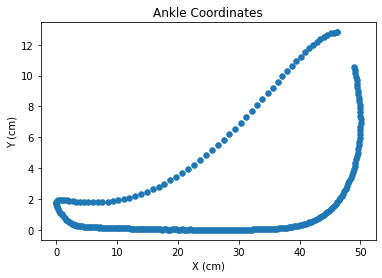

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Upload the Gait_DATA.xlsx file to the runtime before running the code
dataset = pd.read_excel('Gait_DATA.xlsx')

column_list = dataset.columns

X = dataset[column_list[0]]
Y = dataset[column_list[1]]

plt.scatter(X, Y, s = 30)
plt.title("Ankle Coordinates")
plt.xlabel("X (cm)")
plt.ylabel("Y (cm)")

3(c)

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Inverse Kinematics 2R Planar Fixed Axis
def inverse_kinematics(x, y, l1, l2, elbow):  # elbow parameter = 1 or -1 for elbow down and up configurations
    D = (x ** 2 + y ** 2 - l1 ** 2 - l2 ** 2) / (2 * l1 * l2)
    if elbow == 1:
        D = (x ** 2 + y ** 2 - l1 ** 2 - l2 ** 2) / (2 * l1 * l2)
        q2 = elbow * np.arctan2(np.sqrt(abs(1 - D ** 2)), D)  # q2 as measured from frame of link 1
        q1 = np.arctan2(y, x) - np.arctan2(l2 * np.sin(q2), l1 + l2 * np.cos(q2))
        q2 = q2 + q1  # if q2 is not measured from inertial frame then remove this line
    if elbow == -1:
        q2 = elbow * np.arctan2(np.sqrt(abs(1 - D ** 2)), D)  # q2 as measured from frame of link 1
        q1 = np.arctan2(y, x) - np.arctan2(l2 * np.sin(q2), l1 + l2 * np.cos(q2))
        q2 = q2 + q1  # if q2 is not measured from inertial frame then remove this line
    return q1, q2

# Forward Kinematics 2R Planar Fixed Axis
def forward_kinematics(q1, q2, l1, l2):
    x1 = l1 * np.cos(q1)
    y1 = l1 * np.sin(q1)
    x2 = l1 * np.cos(q1) + l2 * np.cos(q2)  # l2*np.cos(q2+q1) will be second term if q2 measured from link1
    y2 = l1 * np.sin(q1) + l2 * np.sin(q2)  # l2*np.sin(q2+q1) will be second term if q2 measured from link1
    return x2, y2

# Upload the Gait_DATA.xlsx file to the runtime before running the code
dataset = pd.read_excel('Gait_DATA.xlsx')

column_list = dataset.columns

# Storing the X and Y coordinates in variables.
X = dataset[column_list[0]]
Y = dataset[column_list[1]]
length = len(X)

# Testing of function working
print("TEST FOR A SINGLE POINT: \n")
print("Given variables:",X[0], Y[0])
a,b = inverse_kinematics(X[0], Y[0], 50, 43, 1) 
print("Joint Variables:",a,b)
x,y = forward_kinematics(a,b, 50,43)
print("Variable Verification",x,y)

# Lengths taken from direct measurement in cm and then adjusted according to the robot. Actual measurements are 50 and 43 repectively, for which angles become undefined at certain points
# Calculating Joint Variables for all values of x and y and verifying the answer
print("\nCALCULATING JOINT VARIABLES FOR ALL VALUES OF X AND Y AND VERIFYING THEM USING FORWARD KINEMATICS, WE GET: \n")

for i in range(length):
  print("Point", i+1,":\n")
  print("Given variables:",X[i], Y[i])
  a,b = inverse_kinematics(X[i], Y[i], 50, 50, 1)
  print("Joint Variables:",np.rad2deg(a),np.rad2deg(b))
  x,y = forward_kinematics(a,b, 50,50)
  print("Variable Verification using forward kinematics:",x,y,"\n")

print("Success. The joint variables are calculated for each point and their values are verified using forward kinematics")

TEST FOR A SINGLE POINT: 

Given variables: 46.108625 12.809129375
Joint Variables: -0.8008257675285899 1.3427669038401604
Variable Verification 44.52621621756182 5.990333114276076

CALCULATING JOINT VARIABLES FOR ALL VALUES OF X AND Y AND VERIFYING THEM USING FORWARD KINEMATICS, WE GET: 

Point 1 :

Given variables: 46.108625 12.809129375
Joint Variables: -45.88393660471301 76.93487645989005
Variable Verification using forward kinematics: 46.108625 12.809129374999998 

Point 2 :

Given variables: 45.6283125 12.786216875
Joint Variables: -46.06064135791248 77.36909510483325
Variable Verification using forward kinematics: 45.6283125 12.786216875000001 

Point 3 :

Given variables: 45.1054375 12.732816875
Joint Variables: -46.28739892470783 77.81509079949146
Variable Verification using forward kinematics: 45.10543750000001 12.732816875000005 

Point 4 :

Given variables: 44.5681875 12.646510625
Joint Variables: -46.55958557696798 78.2428509160647
Variable Verification using forward kinem

4(c)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def animate2R(t, q1t):  # simplest animation function very similar to matlab
  x1 = np.zeros(np.size(q1t))
  # x2 = np.zeros(np.size(q1t))
  y1 = np.zeros(np.size(q1t))
  # y2 = np.zeros(np.size(q1t))
  for i in range(np.size(q1t)):
    plt.clf()  # clear screen
    plt.xlim([-10, 10])
    plt.ylim([-10, 10])
    # forward kinematics to get end points of both links
    x1[i] = l1 * np.cos(q1t[i])
    y1[i] = l1 * np.sin(q1t[i])
    # x2[i] = x1[i] + l2 * np.cos(q2t[i])
    # y2[i] = y1[i] + l2 * np.sin(q2t[i])
    plt.plot([0, x1[i]], [0, y1[i]], '-o')  # draw link1
    # plt.plot([x1[i], x2[i]], [y1[i], y2[i]], '-o')  # draw link2
    plt.pause(0.0001)
  plt.show()

def model(x,t): 
  y = x[0]
  dy = x[1]
  xdot = [[],[]]
  xdot[0] = dy
  xdot[1] = -(k * y)/(m * l**2)
  return (xdot)
  time = np.linspace(0,2,100)
  z2 = odeint(model,[np.pi/6,0],time)

  # plot results
  plt.plot(z1['time'],z1['y'],'r--')
  plt.plot(z1['time'],z1['dy'],'b--')
  plt.plot(time,z2[:,0],'g:')
  plt.plot(time,z2[:,1],'k-.')
  plt.xlabel('Time')
  plt.show()

def dynamic_simulation(m, l, q1):
  g = 9.81
  k = 1000
  tau = m * g * l * np.sin(q1) - k * q1 # net torque taken
  # We subatitute tau in the given equation.
  # We get m * l**2 q_ddot + k * q1 = 0
  # Hence, we solve the above equation to get the values of q

dynamic_simulation(10,3,np.pi/6)